# Feature Selection, Model Selection and Tuning
# Credit Card Users Churn Prediction 

## Description
### Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance

### Objective

Explore and visualize the dataset.
Build a classification model to predict if the customer is going to churn or not
Optimize the model using appropriate techniques
Generate a set of insights and recommendations that will help the bank


### Data Dictionary

1. CLIENTNUM: Client number. Unique identifier for the customer holding the account
2. Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
3. Customer_Age: Age in Years
4. Gender: Gender of the account holder
5. Dependent_count: Number of dependents
6. Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
7. Marital_Status: Marital Status of the account holder
8. Income_Category: Annual Income Category of the account holder
9. Card_Category: Type of Card
10. Months_on_book: Period of relationship with the bank
11. Total_Relationship_Count: Total no. of products held by the customer
12. Months_Inactive_12_mon: No. of months inactive in the last 12 months
13. Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
14. Credit_Limit: Credit Limit on the Credit Card
15. Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
16. Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
17. Total_Trans_Amt: Total Transaction Amount (Last 12 months)
18. Total_Trans_Ct: Total Transaction Count (Last 12 months)
19. Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
20. Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
21. Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

### Importing libraries

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To impute missing values
from sklearn.impute import KNNImputer

# to handle imblacing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
!pip install numpy==1.20.3

<IPython.core.display.Javascript object>

# Exploratory Data Analysis

### Loading Data

In [3]:
# Loading the dataset
credit = pd.read_csv("BankChurners.csv")

<IPython.core.display.Javascript object>

In [4]:
# Checking the number of rows and columns in the data
credit.shape

(10127, 21)

<IPython.core.display.Javascript object>

### Data Overview

In [5]:
data = credit.copy()

<IPython.core.display.Javascript object>

In [6]:
# let's view the first 5 rows of the data
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


<IPython.core.display.Javascript object>

In [7]:
# let's view the last 5 rows of the data
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


<IPython.core.display.Javascript object>

In [8]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

**Observations**
- There are 21 columns and 10127 observations in the dataset.
- We can see that 2 columns have less than 10127 non-null values i.e columns have missing values.
- There are 6 object columns and 15 numerical columns in the dataset.


In [9]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [10]:
# Checking for the null value in the dataset
data.isna().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<IPython.core.display.Javascript object>

In [11]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

<IPython.core.display.Javascript object>

- `Education_Level` column had 15% missing values out of total observations.
- `Marital_Status` column has 7.4% missing values out of total observations.
- We will impute these values after splitting the data into train, validation and test sets.

### Statistical summary

In [12]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


<IPython.core.display.Javascript object>

**Observations:**
- CLIENTNUM: It is a unique identifier for customers and can be dropped as it wouldn't add any information to our analysis.
- Customer_Age: Average age of customers is 46 years, age of customers has a wide range from 26 to 73 years.
- Dependent_count: On average the customers in the data have 2 dependents and a maximum of 5 dependents.
- Months_on_book: All the customers of the bank have at least been with them for a year and 50% of the customers for at least 3 years.
- Total_Relationship_Count: All customers use at least one product of the bank, whereas 75% of customers use 5 or less products of the bank.
- Months_Inactive_12_mon: On average customers were inactive for two months in the past 12 months - this shows that the bank customers are active in transactions or usage of cards it would be interesting to see if high inactivity lead to churning of a customer.
- Contacts_Count_12_mon: On average bank and customers interacted twice in the past 12 months.
- Credit_Limit: There's a huge difference between the third quartile and maximum value. The range of credit limit is very wide from 1438 to 34516, customers with high credit limit might be outliers.
- Total_Revolving_Bal: Average revolving balance of customers is 1162, there's not much difference in the third quartile and maximum value.
- Avg_Open_To_Buy: Average amount that goes unused by the customers is 7469, the range is very wide for this variable and the - extreme values(min and max) might be outliers.
- Total_Amt_Chng_Q4_Q1: For 75% of the customers the tranaction amount in Q4 was less than the transaction amount in Q1 (as value is equal to ~0.9).
- Total_Trans_Amt: Average transaction amount of last 12 months is 4404, some customers spent as little as 510 while some customers made the transaction of more than 18k.
- Total_Trans_Ct: On average customers made 64 or less transactions while 75% of the customers made 81 transactions.
- Total_Ct_Chng_Q4_Q1: For 75% of the customers the number of transaction in Q4 were less than the transactions made in Q1.
- Avg_Utilization_Ratio: On average customers used ~27% of the available credit amount of their card, with 75% of the customers utilizing 50% or less of their available credit amount.

In [13]:
# let's view the statistical summary of the categorical columns in the data
data.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


<IPython.core.display.Javascript object>

- Most of the customers are Female.
- Most of the customers are Married.
- Most of the customers are Graduates.
- Most of the customer make less than $40K per year.
- Most of the customers have Blue card.

**Dropping CLIENTNUM column**

In [14]:
data.drop(["CLIENTNUM"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [15]:
data.shape

(10127, 20)

<IPython.core.display.Javascript object>

**Let's create a list of numerical and categorical columns**

In [16]:
# list for catagorical columns
cat_cols = []

# list for numerical columns
num_cols = []

for i in data.columns:
    if data[i].dtypes == "object":
        cat_cols.append(i)
    else:
        num_cols.append(i)

print("There are", len(cat_cols), "categorical columns")
print("Categorical columns are:")
print(cat_cols)
print("*" * 30)
print("There are", len(num_cols), "numerical columns")
print("Numerical columns are:")
print(num_cols)

There are 6 categorical columns
Categorical columns are:
['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
******************************
There are 14 numerical columns
Numerical columns are:
['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


<IPython.core.display.Javascript object>

**Checking the value count for each category of categorical variables**

In [17]:
# Printing number of count of each unique value in each column
print("Value count for each categorical variable:\n")
for column in cat_cols:
    print("The value counts of ", column, ":\n")
    print(data[column].value_counts(normalize=True))
    print("-" * 40)

Value count for each categorical variable:

The value counts of  Attrition_Flag :

Existing Customer   0.839
Attrited Customer   0.161
Name: Attrition_Flag, dtype: float64
----------------------------------------
The value counts of  Gender :

F   0.529
M   0.471
Name: Gender, dtype: float64
----------------------------------------
The value counts of  Education_Level :

Graduate        0.363
High School     0.234
Uneducated      0.173
College         0.118
Post-Graduate   0.060
Doctorate       0.052
Name: Education_Level, dtype: float64
----------------------------------------
The value counts of  Marital_Status :

Married    0.500
Single     0.420
Divorced   0.080
Name: Marital_Status, dtype: float64
----------------------------------------
The value counts of  Income_Category :

Less than $40K   0.352
$40K - $60K      0.177
$80K - $120K     0.152
$60K - $80K      0.138
abc              0.110
$120K +          0.072
Name: Income_Category, dtype: float64
-------------------------------

<IPython.core.display.Javascript object>

**Observations**
- 83% of the customers are existing customers whereas 16% of the customers are Attrited customers.
- 52% of the customers are Female.
- 36% of the customers have education level Graduate.
- 50% of the customers are Married.
- `Income_Category` :
    - Most of the customers have less than $40K as income. 
    - 11% of the customer have 'abc' value in place of their income, this value should be treated as missing values and replaced with most frequent values.
- 93% of the customers have Blue card.

**Checking the value count for numerical variables which has less unique values**

In [18]:
# Printing number of count of each unique value in each column
print("Value count for each numerical variable:\n")
for column in num_cols:
    if data[column].nunique() <= 7:
        print("The value counts of ", column, ":\n")
        print(data[column].value_counts(normalize=True))
        print("-" * 40)

Value count for each numerical variable:

The value counts of  Dependent_count :

3   0.270
2   0.262
1   0.181
4   0.155
0   0.089
5   0.042
Name: Dependent_count, dtype: float64
----------------------------------------
The value counts of  Total_Relationship_Count :

3   0.228
4   0.189
5   0.187
6   0.184
2   0.123
1   0.090
Name: Total_Relationship_Count, dtype: float64
----------------------------------------
The value counts of  Months_Inactive_12_mon :

3   0.380
2   0.324
1   0.220
4   0.043
5   0.018
6   0.012
0   0.003
Name: Months_Inactive_12_mon, dtype: float64
----------------------------------------
The value counts of  Contacts_Count_12_mon :

3   0.334
2   0.319
1   0.148
4   0.137
0   0.039
5   0.017
6   0.005
Name: Contacts_Count_12_mon, dtype: float64
----------------------------------------


<IPython.core.display.Javascript object>

**Observations**
- 27% of the customers have 3 dependent.
- 22% of the customers have 3 products with the bank.
- 38% of the customers don't use their account for 3 months.
- 33% of the customers contacted the bank 3 times in last 12 months.

## Univariate Analysis

### Univariate EDA on Numerical variables

In [19]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [20]:
# Function to create barplots that indicate percentage for each category.


def perc_on_bar(z):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """

    total = len(data[z])  # length of the column
    plt.figure(figsize=(15, 5))
    ax = sns.countplot(data[z], palette="Paired")
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot

        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Observations on Customer_Age

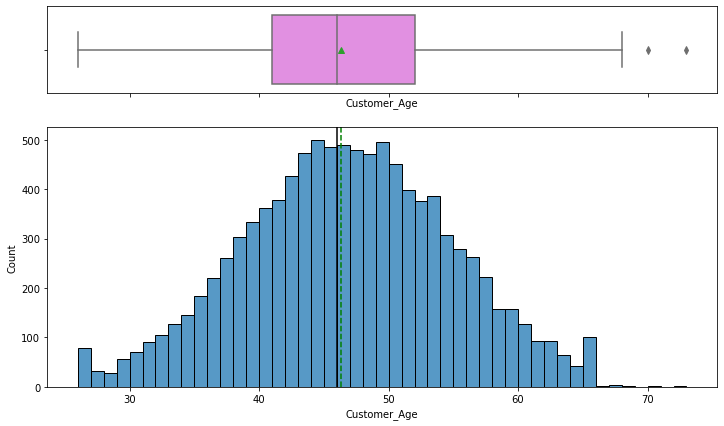

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(data, "Customer_Age")

- The distribution of Customer_Age is normally distributed with mean and median at 46 years.
- From the boxplot, we can see that there are a few outliers.

### Observations on Dependent_count

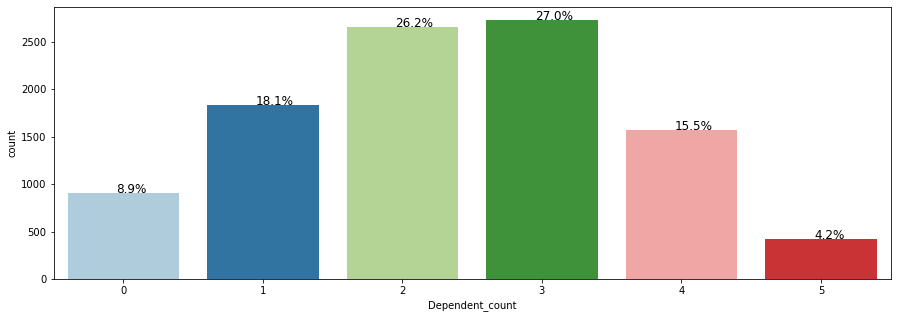

<IPython.core.display.Javascript object>

In [22]:
perc_on_bar("Dependent_count")

- The distribution of dependents is very realistic with most customers having 2 or 3 dependents.

### Observations on Months_on_book

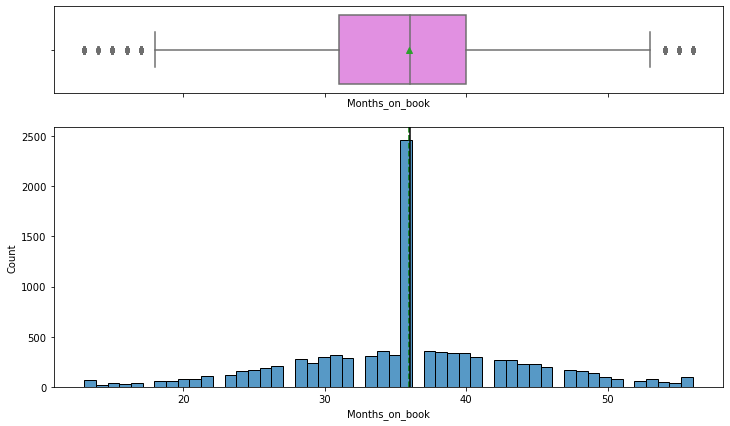

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(data, "Months_on_book")

- Most customers are with the bank for 3 years.
- From the boxplot, we can see that there are outliers on both sides of the whiskers.

### Observations on Total_Relationship_Count

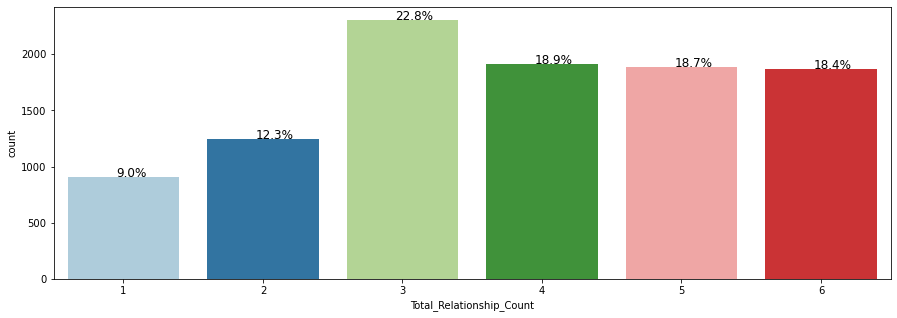

<IPython.core.display.Javascript object>

In [24]:
perc_on_bar("Total_Relationship_Count")

- 22.8% of the customers are using 3 products offered by the bank while an equal percentage ~19% of customers use 4 or more than 4 products.
- Equal percentage of customers using 4,5 and 6 products might suggest that customers who opt or buy the 4th product will also be ready to buy more products.

### Observations on Months_Inactive_12_mon

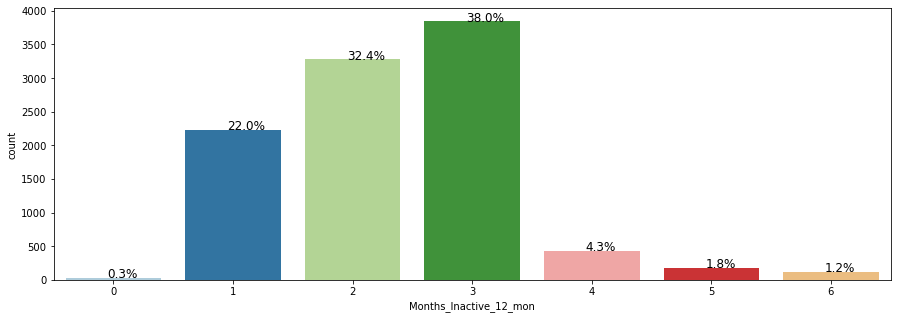

<IPython.core.display.Javascript object>

In [25]:
perc_on_bar('Months_Inactive_12_mon')


- Only 7.5% of the customers were inactive for more than 3 months.

### Observations on Contacts_Count_12_mon

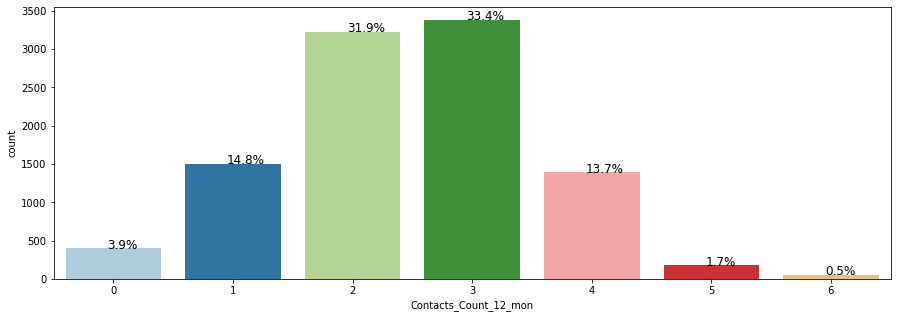

<IPython.core.display.Javascript object>

In [26]:
perc_on_bar("Contacts_Count_12_mon")

- ~16% of the customers interacted with the bank more than 3 times in the past 12 months.

### Observations on Credit_Limit

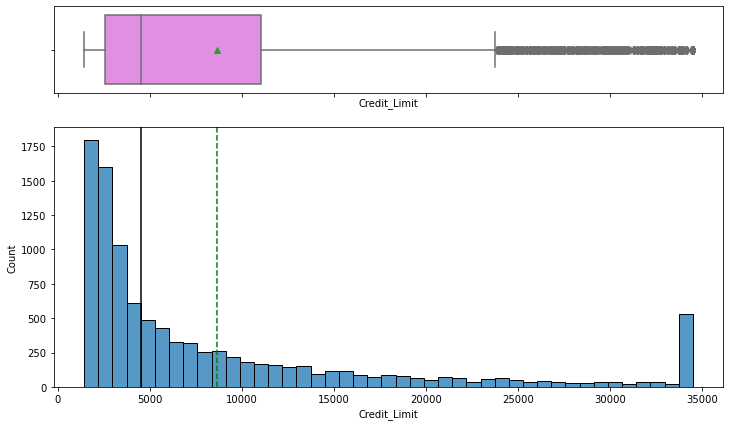

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(data, "Credit_Limit")

- The distribution of the Credit_Limit is skewed to the right.
- There are quite a few customers with a maximum Credit Limit of 35000.
- 50% of the customers of the bank have a credit limit of less than <5000.

### Observations on Total_Revolving_Bal

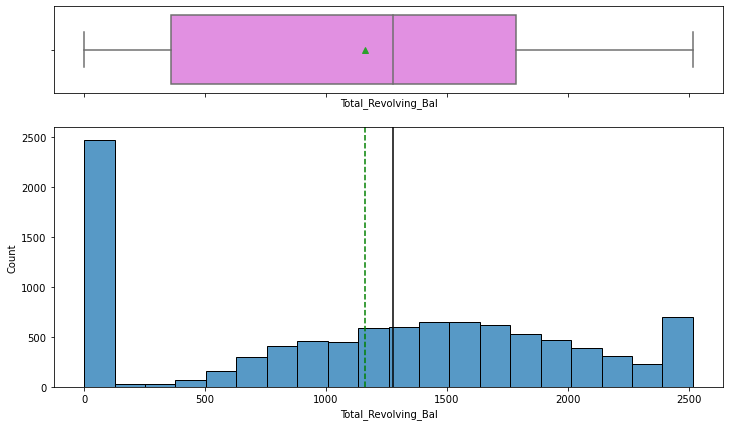

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(data, "Total_Revolving_Bal")

- Most customers pay the complete dues of credit card and have 0 revolving balance.
- There are quite a few customers with a revolving balance of 2500

### Observations on Avg_Open_To_Buy

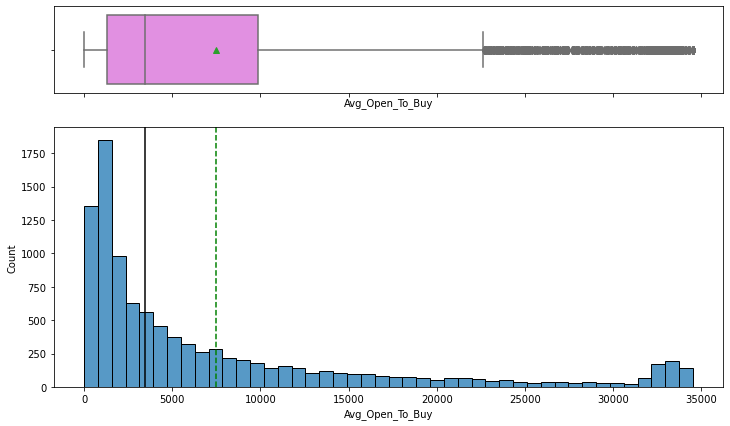

<IPython.core.display.Javascript object>

In [29]:
histogram_boxplot(data, "Avg_Open_To_Buy")

- The distribution of the Avg_Open_To_Buy column is right-skewed.
- A right-skewed distribution indicates that most customers used a big part of their limit while only a few customers (on the right tail) were left with a majority of their credit amount.

### Observations on Total_Amt_Chng_Q4_Q1

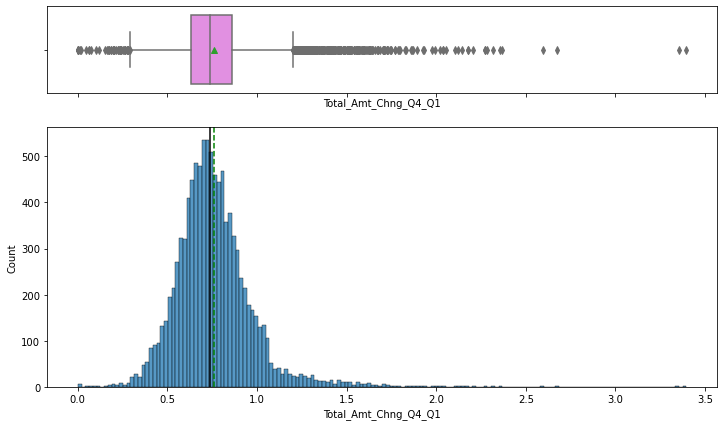

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1")

- The distribution of Total_Amt_Chng_Q4_Q1 looks normally distributed but there's a slight skew towards the right.
- From the boxplot, we can see that there are outliers on both sides of the whiskers.

### Observations on Total_Trans_Amt

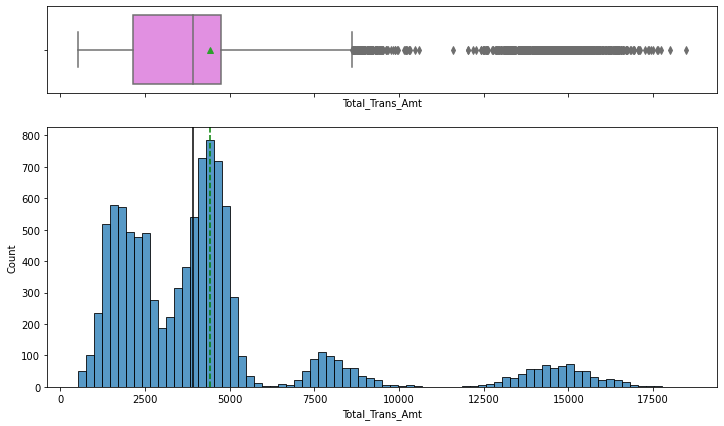

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(data, "Total_Trans_Amt")

- The distribution of Total_Trans_Amt is skewed to the right.
- There are two peaks in data at total transaction amounts of one around 2500 and second around the mean value of ~4500.
- From the boxplot, we can see that there are outliers - customers with more than ~8000 total transaction amounts are being considered as outliers.
- It would be interesting to check if the customers spending less with the card are the ones churning or the ones spending more are churning, if the latter is the case then there is a problem for the bank as it is losing valuable customers.

### Observations on Total_Trans_Ct

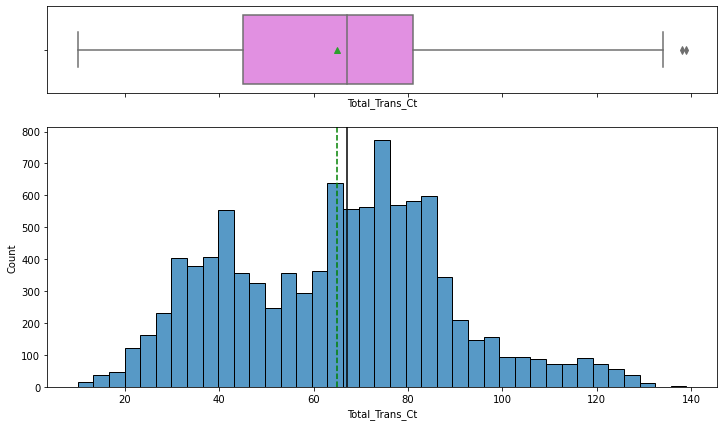

<IPython.core.display.Javascript object>

In [32]:
histogram_boxplot(data, "Total_Trans_Ct")

- The distribution of Total_Trans_Ct shows two peaks on 40 and 80 transactions in a year which indicates that customers used credit cards 3 to 6 times a month to make transactions.

### Observations on Total_Ct_Chng_Q4_Q1

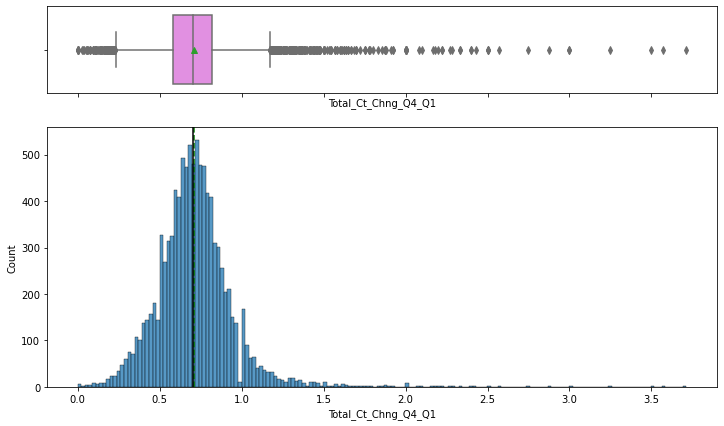

<IPython.core.display.Javascript object>

In [33]:
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1")

- The distribution of Total_Ct_Chng_Q4_Q1 looks normally distributed but there's a slight skew towards the right.
- From the boxplot, we can see that there are outliers on both sides of the whiskers.

### Observations on Avg_Utilization_Ratio

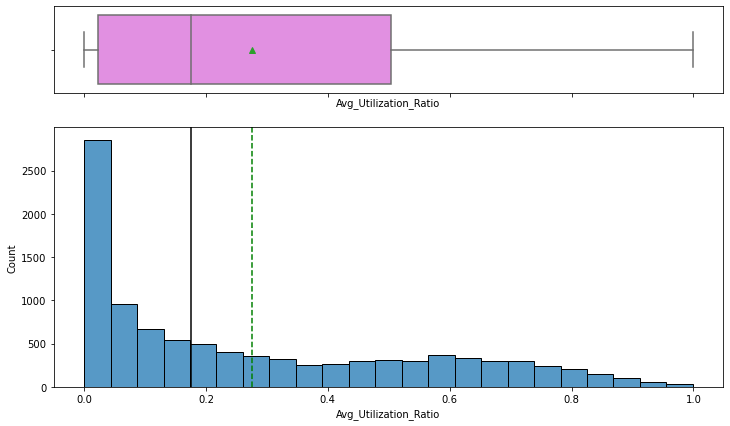

<IPython.core.display.Javascript object>

In [34]:
histogram_boxplot(data, "Avg_Utilization_Ratio")

- The distribution of Avg_Utilization_Ratio is skewed to the right.
- This distribution is not a positive sign for the bank as most of the customers are not utilizing their credit amount.

## Univariate EDA on Categorical variables

### Observations on Attrition_Flag

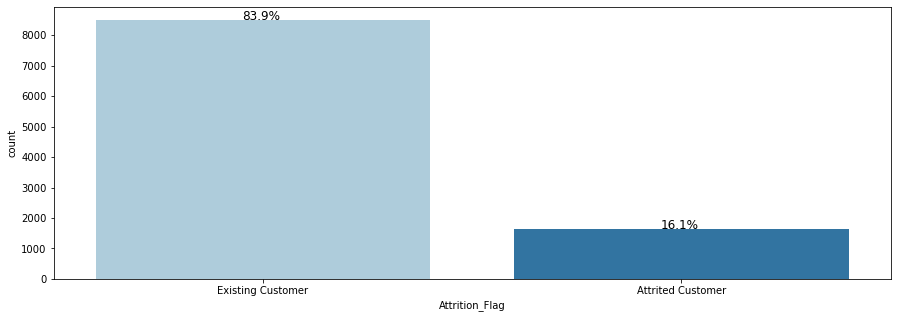

<IPython.core.display.Javascript object>

In [35]:
perc_on_bar("Attrition_Flag")

- 16.1% of the customers attrited.
- This indicates an imbalance in the data.

### Observations on Gender

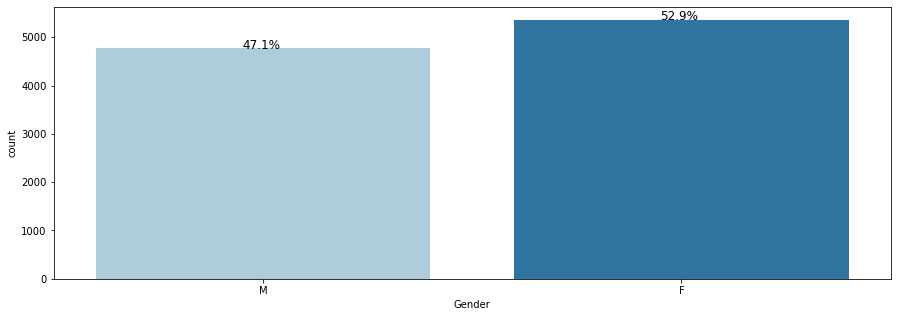

<IPython.core.display.Javascript object>

In [36]:
perc_on_bar("Gender")

- We have an almost equal percentage of Male and Female customers.

### Observations on Education_Level

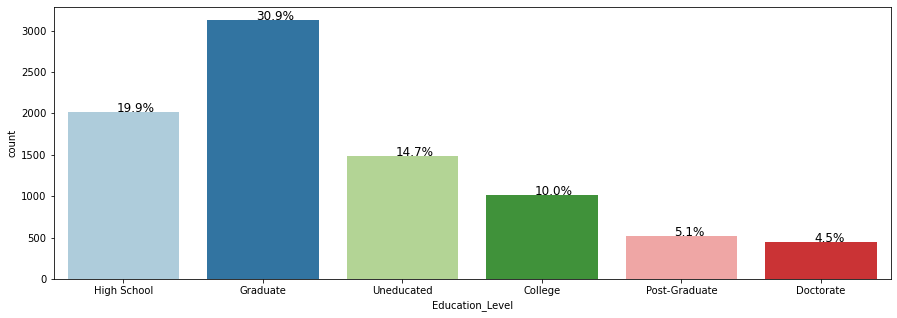

<IPython.core.display.Javascript object>

In [37]:
perc_on_bar("Education_Level")

- 30.9% of the customers are graduates, followed by 19.9% of the customers who completed high school.

### Observations on Marital_Status

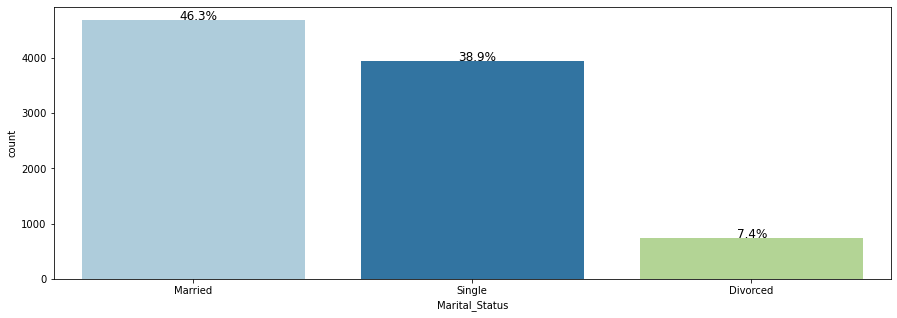

<IPython.core.display.Javascript object>

In [38]:
perc_on_bar("Marital_Status")

- 46.3% of the customers are Married, followed by 38.9% of Single customers.

### Observations on Income_Category

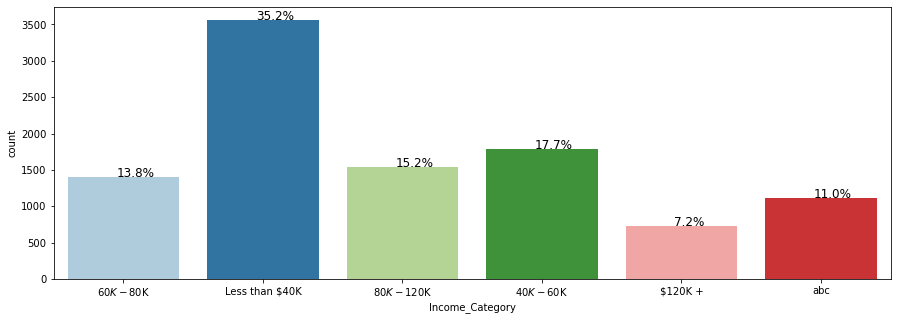

<IPython.core.display.Javascript object>

In [39]:
perc_on_bar("Income_Category")

- 35.2% of the customers lie in the Less than 40k income category group, followed by 17.7% of the customers in the 40k-60k income group.
- Percentage of missing value in Income_Category column - 11%.

### Observations on Card_Category

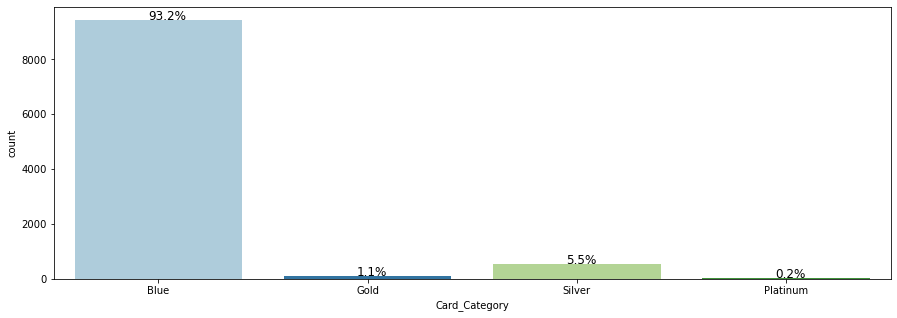

<IPython.core.display.Javascript object>

In [40]:
perc_on_bar("Card_Category")

- 93.2% of the customers have the Blue card.
- Blue card would be a standard card given by the bank to all its customers.

## Bivariate Analysis

In [41]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

<IPython.core.display.Javascript object>

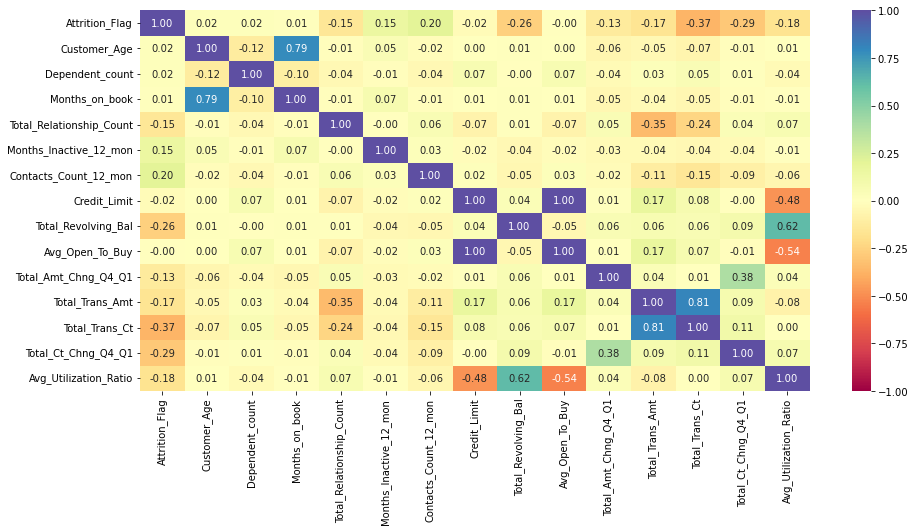

<IPython.core.display.Javascript object>

In [42]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Attrition_Flag shows a bit of a negative correlation with Total_Trans_Ct (total transactions) and Total_Trans_Amt (total transaction amount).
- There's a strong positive correlation between Months_on_book and Customer_Age, Total_Revolving_Bal and Avg_Utilization_Ratio, Total_Trans_Amt and Total_Trans_Ct.
- There's a negative correlation of Total_Relationship_count with Total_Trans_Amt and Total_Trans_Ct, Avg_Utilization_Ratio with Credit_Limit and Avg_Open_To_Buy.

In [43]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,data['Attrition_Flag'],margins=True).sort_values(by=1,ascending=False)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,data['Attrition_Flag'],normalize='index').sort_values(by=1,ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()


<IPython.core.display.Javascript object>

### Attrition_Flag vs Gender

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


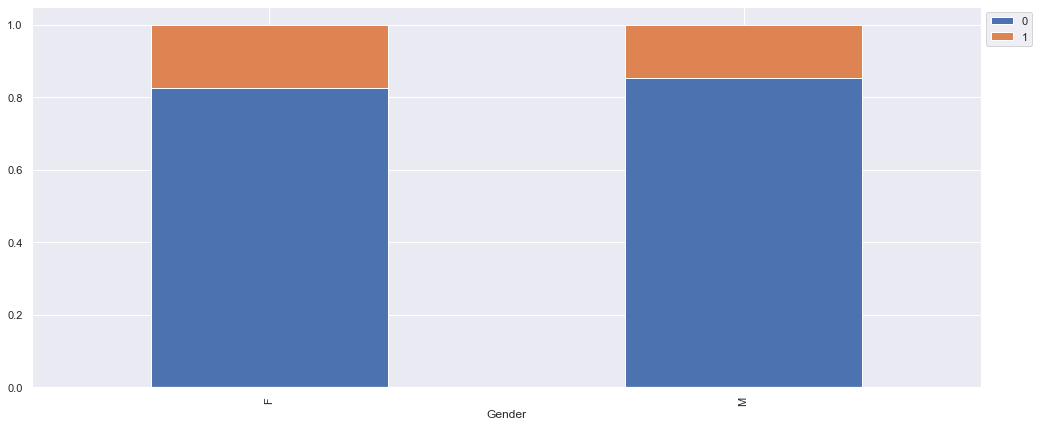

<IPython.core.display.Javascript object>

In [44]:
stacked_plot(data["Gender"])

- There's not much difference in attrition percentages for Males and Females.
- ~20% of both Males and Females attrite.

### Attrition_Flag vs Marital_Status

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


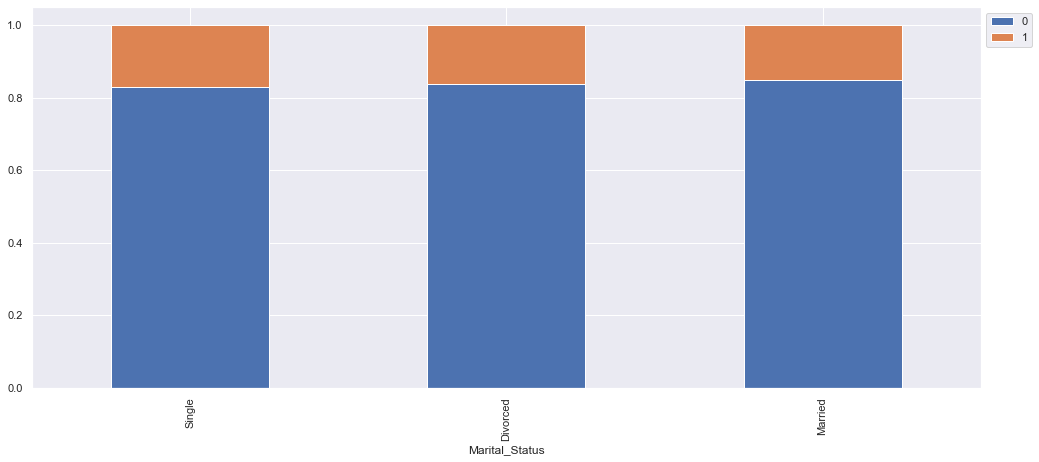

<IPython.core.display.Javascript object>

In [45]:
stacked_plot(data["Marital_Status"])

- There's not much difference in attrition percentages for Marital_Status.
- ~20% of Singles, Divorced attrite.
- Married customers attrite the least.

### Attrition_Flag vs Education_Level

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


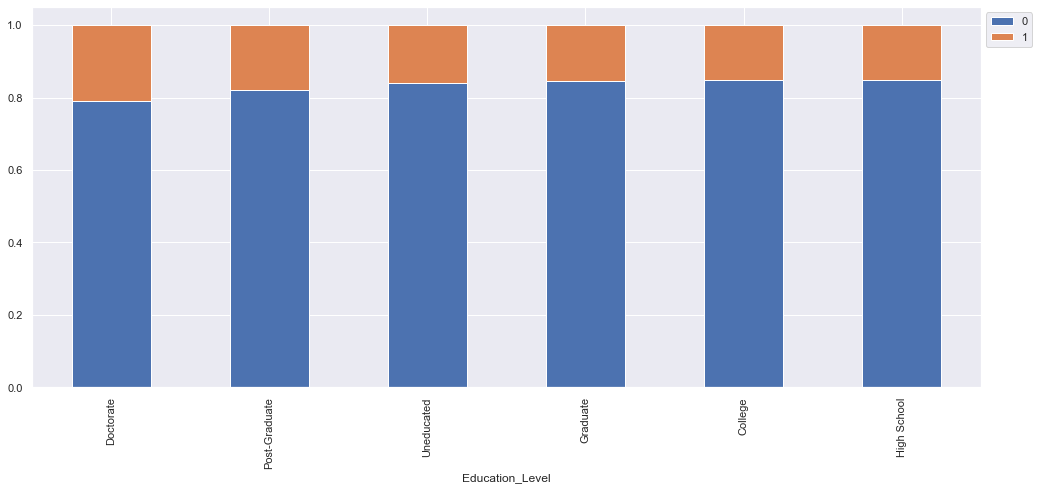

<IPython.core.display.Javascript object>

In [46]:
stacked_plot(data["Education_Level"])

- Customers with higher education - Doctorates and Post Graduates are the ones most(~20% for both education levels) attriting.

### Attrition_Flag vs Income_Category

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


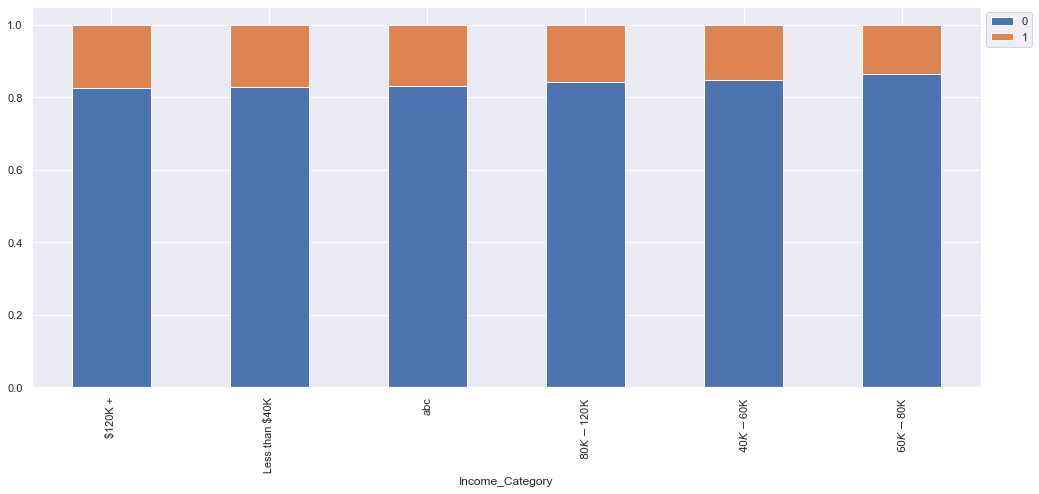

<IPython.core.display.Javascript object>

In [47]:
stacked_plot(data["Income_Category"])

- The customers from two extreme income groups - Earning less than 40K and Earning more than 120k+ are the ones attriting the most.

### Attrition_Flag vs Card_Category

Attrition_Flag     0     1    All
Card_Category                    
All             8500  1627  10127
Blue            7917  1519   9436
Silver           473    82    555
Gold              95    21    116
Platinum          15     5     20
------------------------------------------------------------------------------------------------------------------------


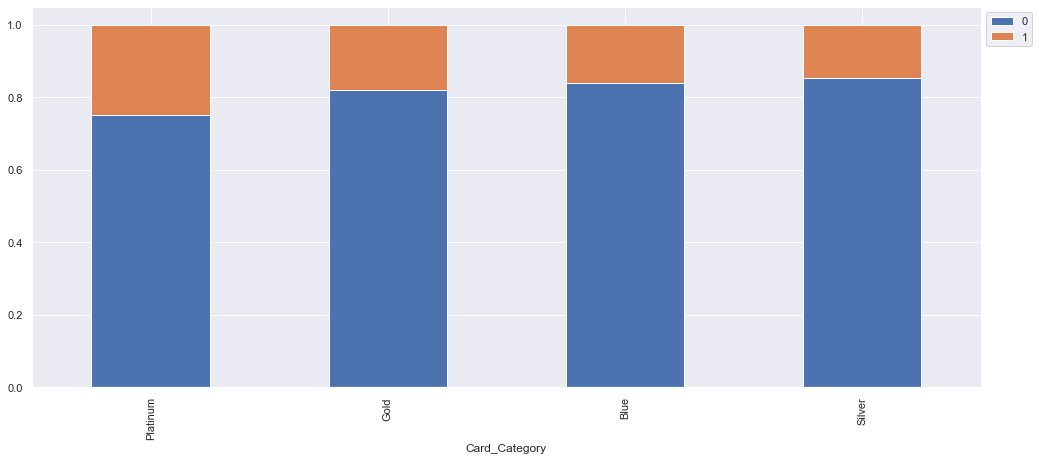

<IPython.core.display.Javascript object>

In [48]:
stacked_plot(data["Card_Category"])

- ~35% of attrition is amongst the customers with platinum cards followed by ~30% attrition in Gold cards.
- Customers with Platinum and Gold cards are our premium customers and the highest attrition for these customers is alarming as they are using the premium card provided by the bank.

### Attrition_Flag vs Contacts_Count_12_mon

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


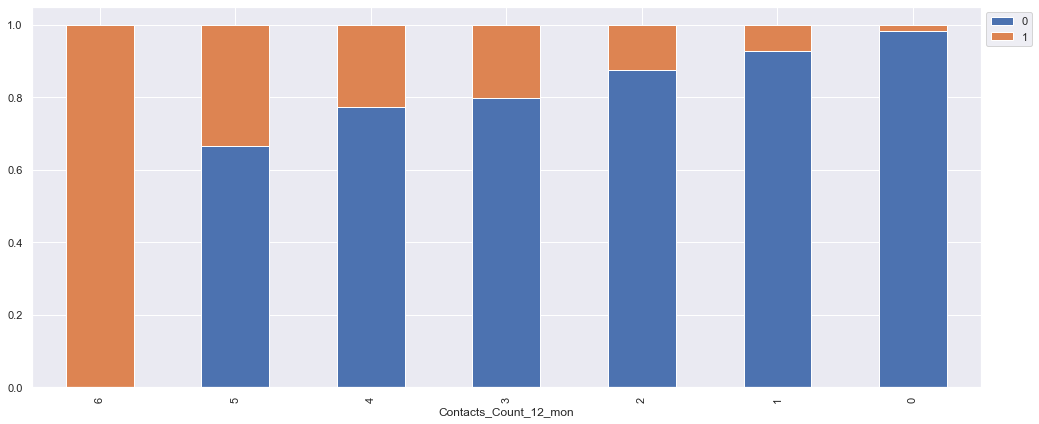

<IPython.core.display.Javascript object>

In [49]:
stacked_plot(data["Contacts_Count_12_mon"])

- Highest attrition is among the customers who interacted the most with the bank.
- This signifies that the bank is not able to resolve the problems faced by customers leading to attrition
- A preliminary step to identify attriting customers would be to look out for customers who have reached out to them repeatedly.

### Attrition_Flag vs Months_Inactive_12_mon

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


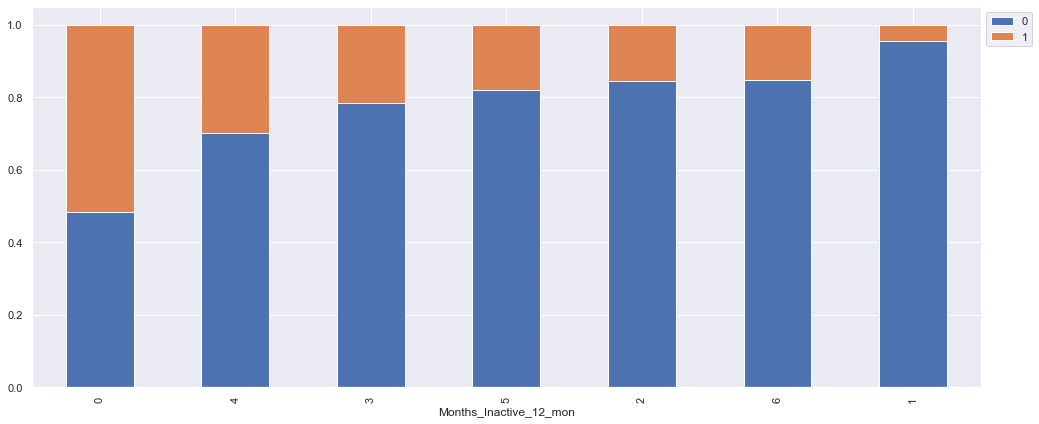

<IPython.core.display.Javascript object>

In [50]:
stacked_plot(data["Months_Inactive_12_mon"])

- As inactivity increases attrition also increases (2-4 months)
- The interpretation from here for 0 months and 6 months is difficult as customers who recently used the card attrited the most while those who were inactive for 6 months attrited less.

### Attrition_Flag vs Total_Relationship_Count

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


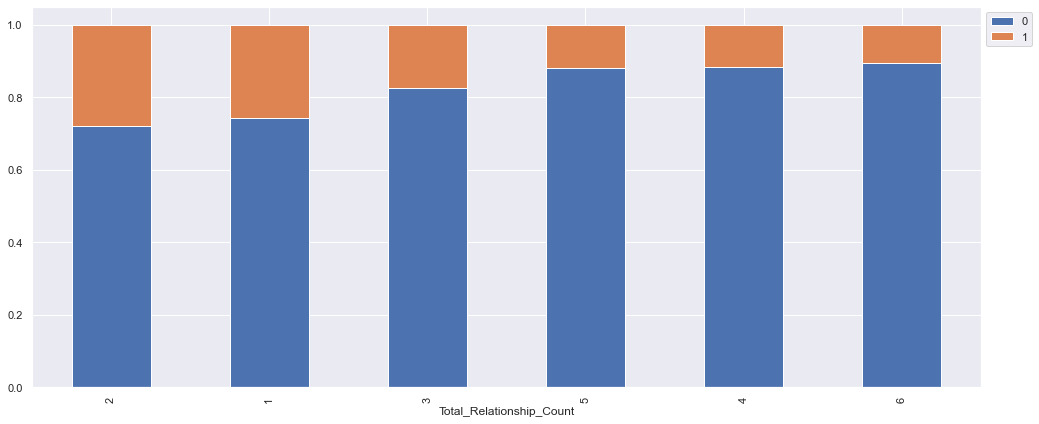

<IPython.core.display.Javascript object>

In [51]:
stacked_plot(data["Total_Relationship_Count"])

- Attrition is highest among the customers who are using 1 or 2 products offered by the bank - together they constitute ~55% of the attrition.
- Customers who use more than 3 products are the ones least attriting, such customers might be more financially stable and actively invest in different services provided by the bank.

### Attrition_Flag vs Dependent_count

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


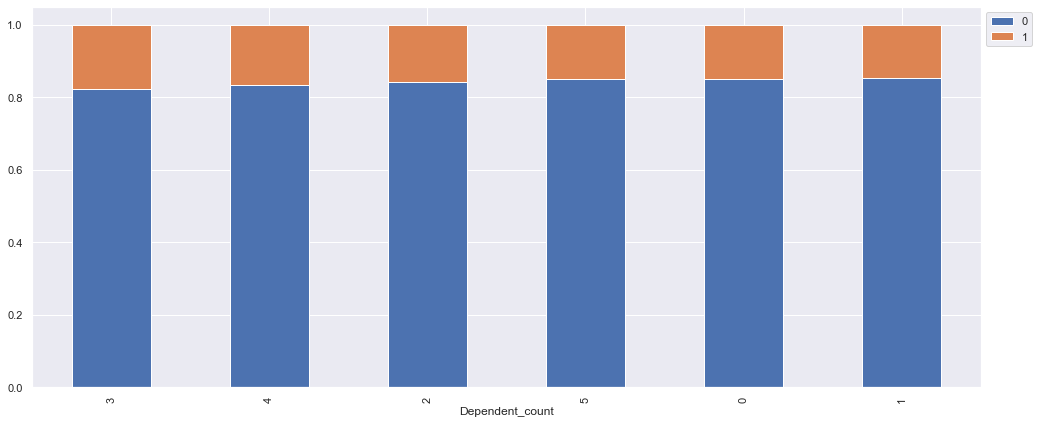

<IPython.core.display.Javascript object>

In [52]:
stacked_plot(data["Dependent_count"])

- More the number of dependents more is the attrition, more responsibilities might lead to financial instability in such customers.
- Attrition is fairly low for customers with 0 or 1 dependents.

In [53]:
# Function to plot distributions and Boxplots of customers
def plot(x, target="Attrition_Flag"):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs[0, 0].set_title("Distribution of an Attrited Customer")
    sns.distplot(data[(data[target] == 1)][x], ax=axs[0, 0], color="teal")
    axs[0, 1].set_title("Distribution of an Existing Customer")
    sns.distplot(data[(data[target] == 0)][x], ax=axs[0, 1], color="orange")
    axs[1, 0].set_title("Boxplot w.r.t Attrition_Flag")
    sns.boxplot(data[target], data[x], ax=axs[1, 0], palette="gist_rainbow")
    axs[1, 1].set_title("Boxplot w.r.t Attrition_Flag - Without outliers")
    sns.boxplot(
        data[target], data[x], ax=axs[1, 1], showfliers=False, palette="gist_rainbow"
    )
    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

### Attrition_Flag vs Customer_Age

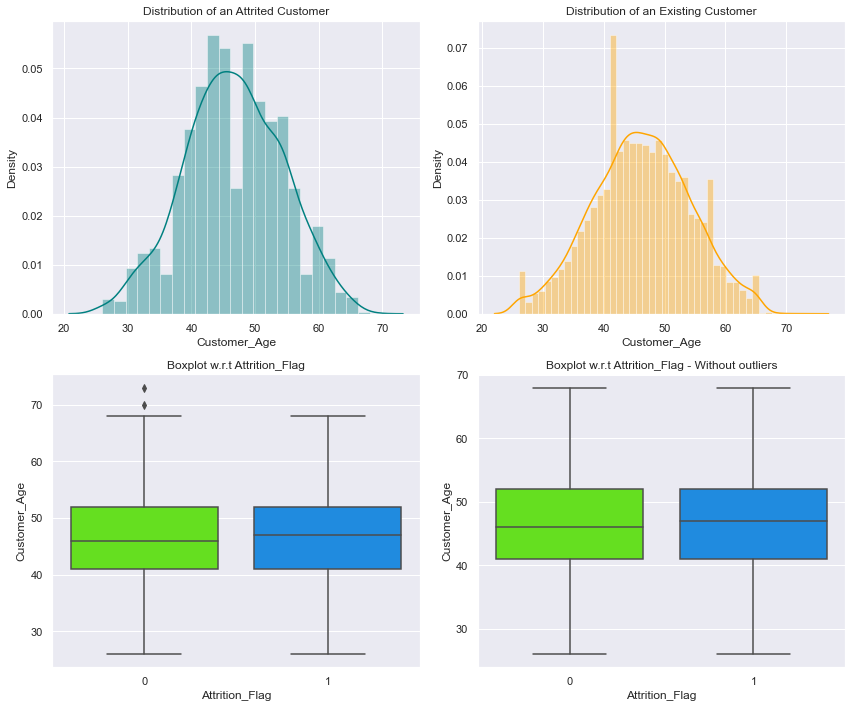

<IPython.core.display.Javascript object>

In [54]:
plot("Customer_Age")

- There's no difference in the age of customers who attrited and who didn't.

### Attrition_Flag vs Months_on_book

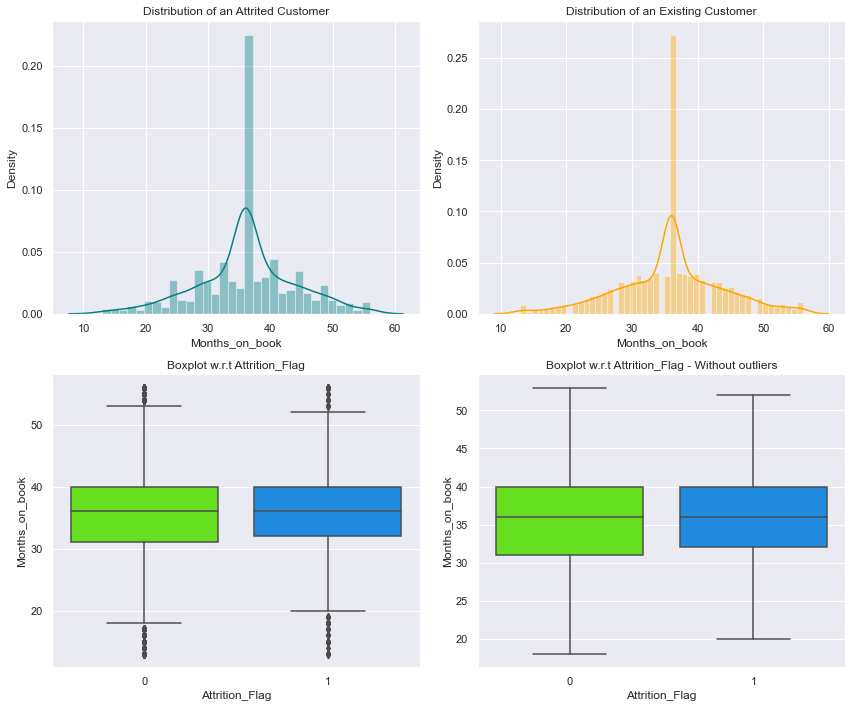

<IPython.core.display.Javascript object>

In [55]:
plot("Months_on_book")

- Tenure of relationship with the bank doesn't seem to have an impact on attrition.

### Attrition_Flag vs Credit_Limit

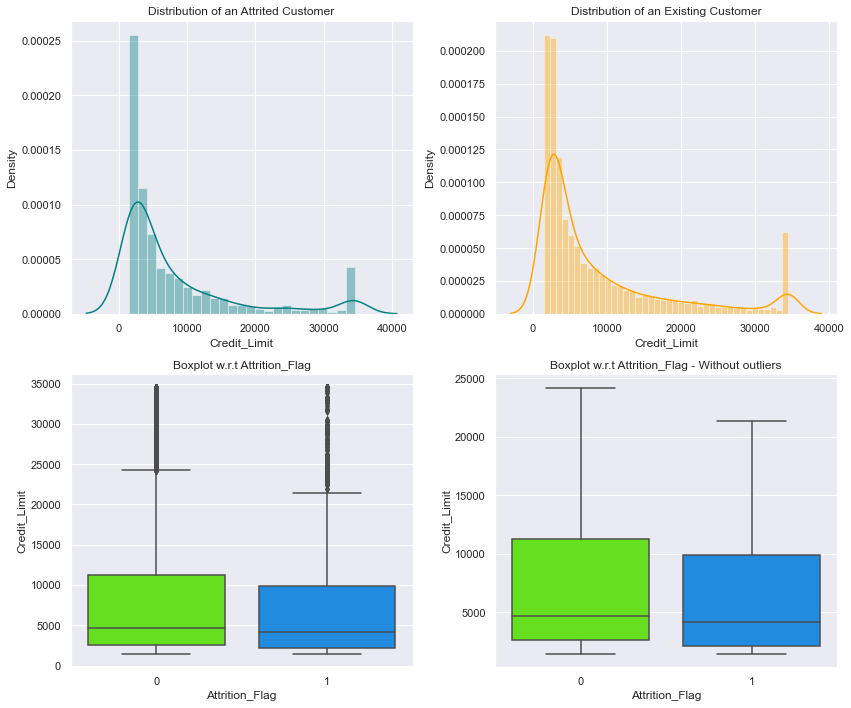

<IPython.core.display.Javascript object>

In [56]:
plot("Credit_Limit")

- Customers with lower credit are the ones who attrited.

### Attrition_Flag vs Total_Revolving_Bal

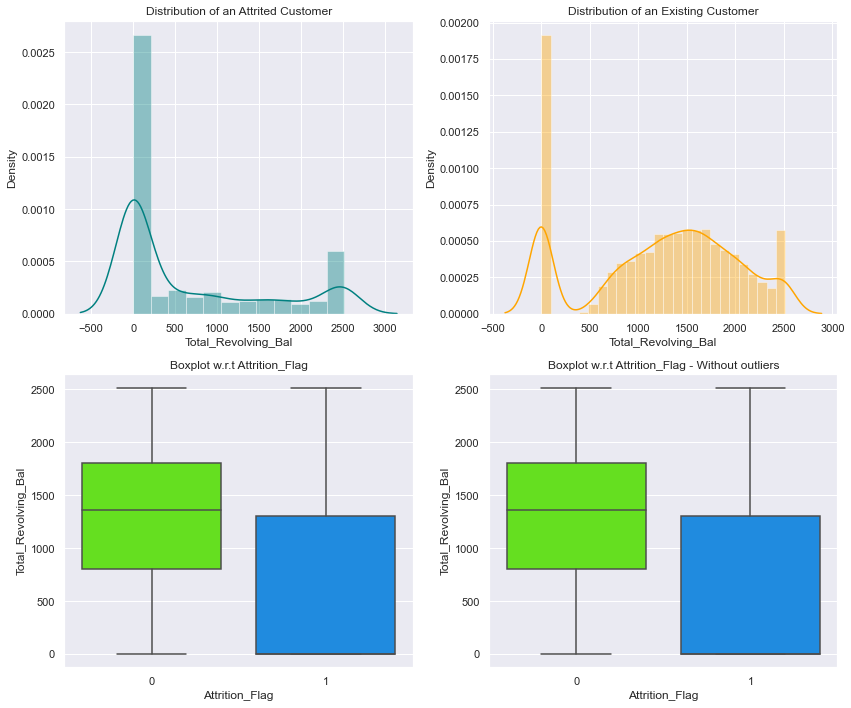

<IPython.core.display.Javascript object>

In [57]:
plot("Total_Revolving_Bal")

- Customers with less total revolving balance are the ones who attrited, such customers must have cleared their dues and opted out of the credit card service.

### Attrition_Flag vs Avg_Open_To_Buy

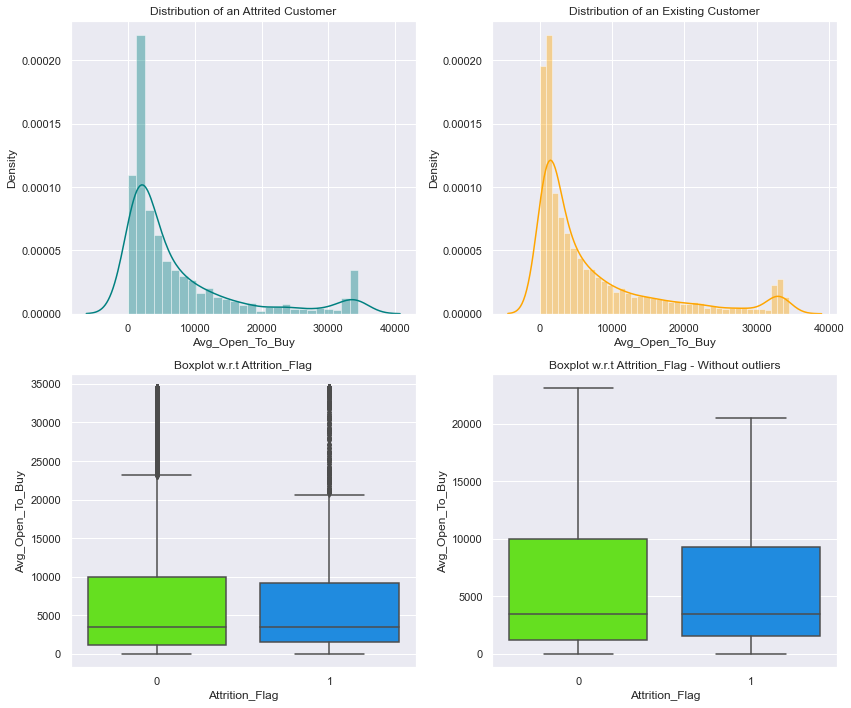

<IPython.core.display.Javascript object>

In [58]:
plot("Avg_Open_To_Buy")

- There's not much difference in the distribution for an attrited and existing customer.

### Attrition_Flag vs Total_Trans_Ct

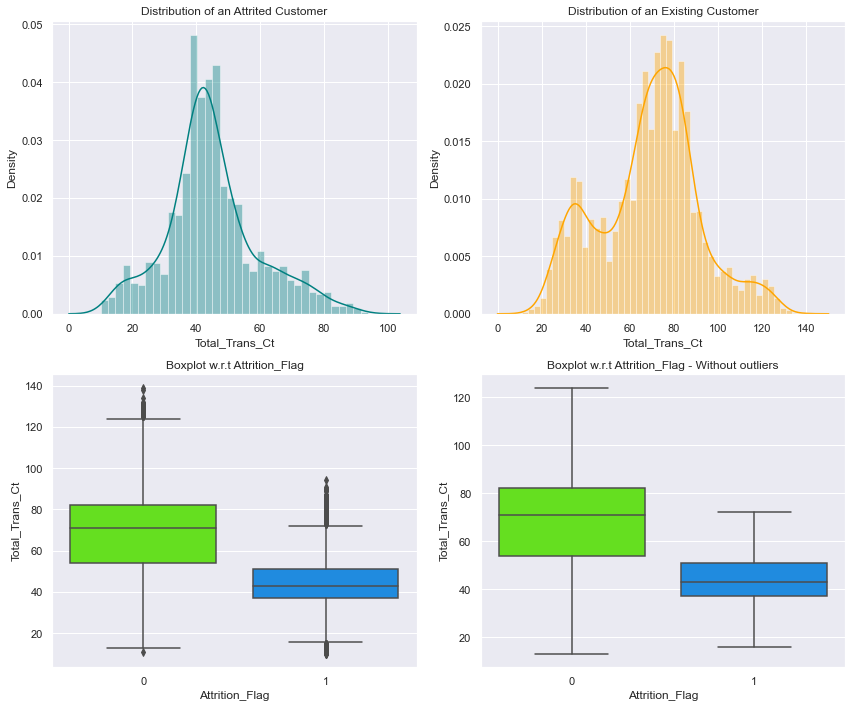

<IPython.core.display.Javascript object>

In [59]:
plot("Total_Trans_Ct")

- Less number of transactions lead to higher attrition.
- Customers with less than 80 to 100 transactions (or median transactions equal to 40) in a year should be more focussed upon.

### Attrition_Flag vs Total_Trans_Amt

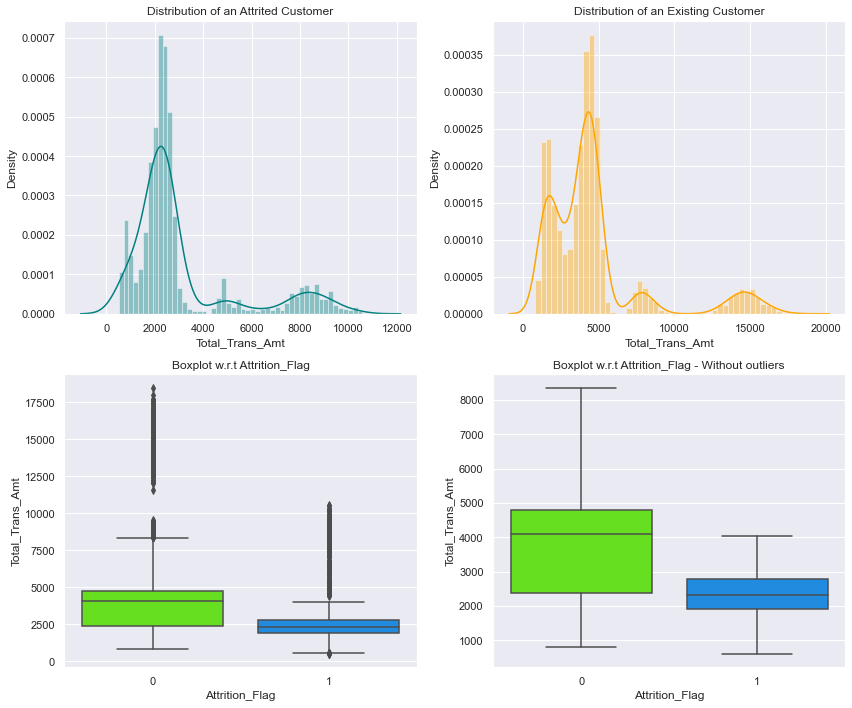

<IPython.core.display.Javascript object>

In [60]:
plot("Total_Trans_Amt")

- Less number of transactions might lead to a less transaction amount and eventually leading to customer attrition.

### Attrition_Flag vs Total_Amt_Chng_Q4_Q1

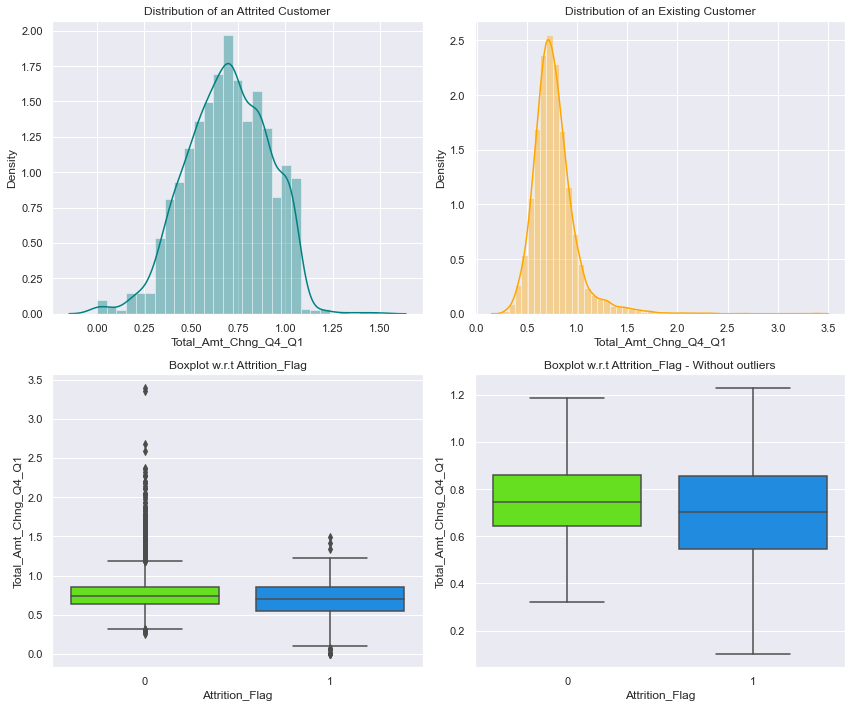

<IPython.core.display.Javascript object>

In [61]:
plot("Total_Amt_Chng_Q4_Q1")

- Customers who didn't attrite showed less variability across Q4 to Q1 as compared to the ones who attrited.

### Attrition_Flag vs Total_Ct_Chng_Q4_Q1

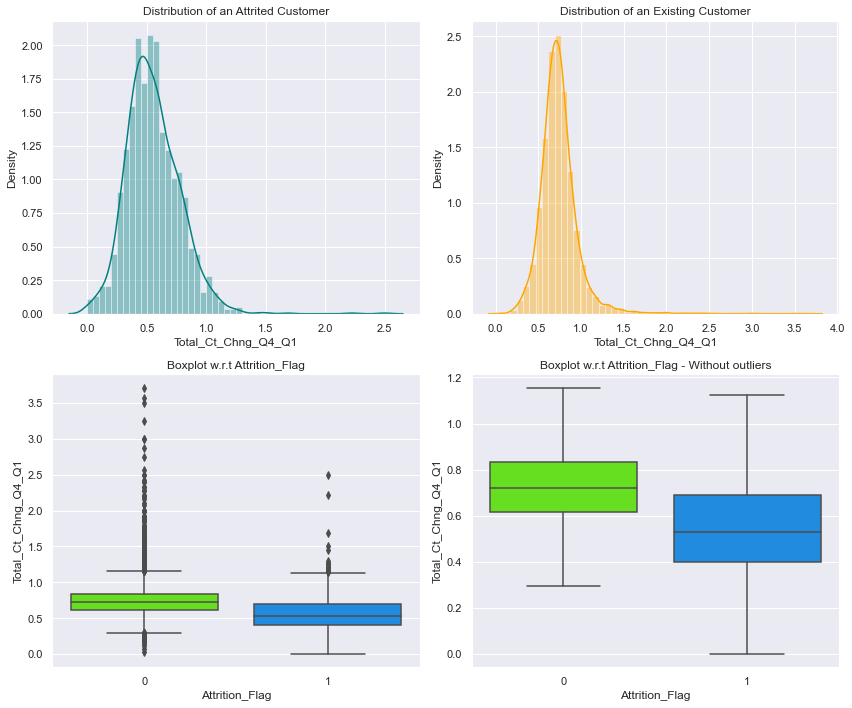

<IPython.core.display.Javascript object>

In [62]:
plot("Total_Ct_Chng_Q4_Q1")

- Customers who didn't attrite showed less variability across Q4 to Q1 as compared to the ones who attrited.

### Attrition_Flag vs Avg_Utilization_Ratio

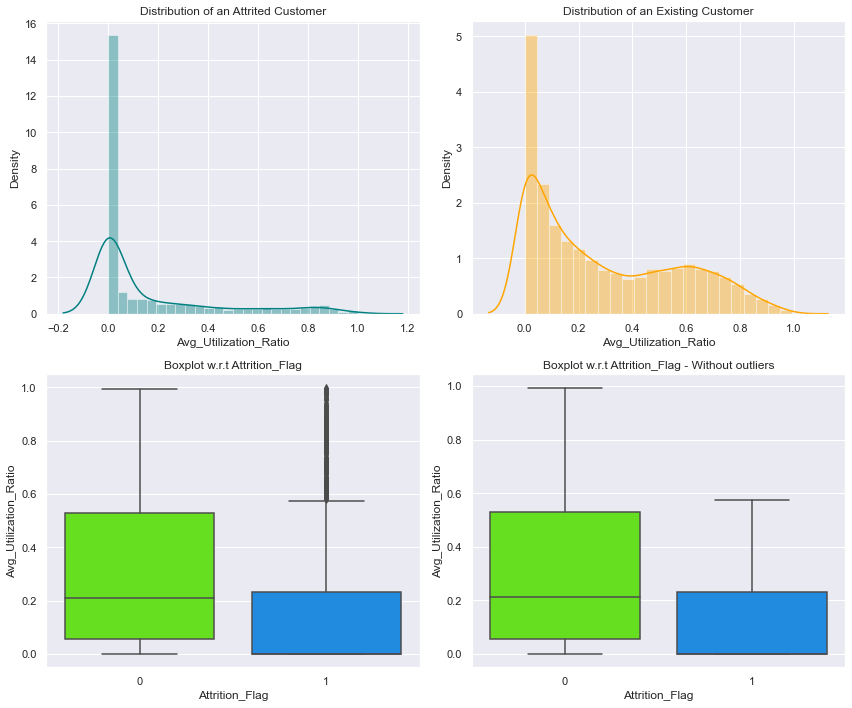

<IPython.core.display.Javascript object>

In [63]:
plot("Avg_Utilization_Ratio")

- Customers utilizing their full credit limit are the ones who didn't attrite.
- Less utilization of the available credits indicates inactivity of customers.

### Customer_Age with Credit_Limit, Total_Trans_Amt and Avg_Utilization_Ratio

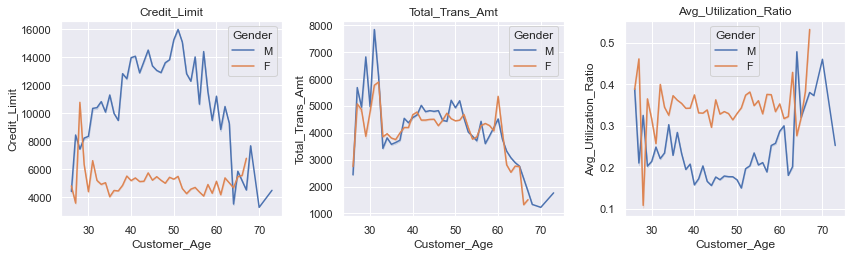

<IPython.core.display.Javascript object>

In [64]:
cols = data[
    ["Credit_Limit", "Total_Trans_Amt", "Avg_Utilization_Ratio"]
].columns.tolist()
plt.figure(figsize=(12, 10))
for i, variable in enumerate(cols):
    plt.subplot(3, 3, i + 1)
    sns.lineplot(data=data, x="Customer_Age", y=variable, hue="Gender", ci=False)
    plt.tight_layout()
    plt.title(variable)
plt.show()

- For Male, credit limit increases with age till 50 years but for female customers the credit limit is constant throughout.
- Althought the credit limit is less for female cutomers, the total transactions made by them for all age group is same as male customers.
- Female cutomers utilized their credits more than male customers, where utilization is dropped between ages 30 - 50 but increased after 60 years.

## EDA Insights
- Age of the customers does not affect the attrition of credit card customers.
- Male and Female customers have same attrition rate.
- Customers having higher education attrited the most.
- Marital Status of the customers does not affect the attrition much.
- Customers who interacted more with the bank attrited the most. This indicates that bank is not able to resolve their problem,  this should be addressed and steps should be taken for the customer who contacted the bank frequently.
- Tenure of relationship with the bank doesn't seem to have an impact on attrition.
- Customers with lower credit attrited the most.
- Inactivity of the customer increases, attrition increases.
- Customers with more dependants attrited the most.
- Attrition is highest among the customers who are using 1 or 2 products offered by the bank - together they constitute ~55% of the attrition.
- Customers with less total revolving balance are the ones who attrited, such customers must have cleared their dues and opted out of the credit card service.
- Customers who has less number of transaction attrited the most.
- Less utilization of the available credits indicates inactivity of customers and leads to attrition.

## Data Preparation 

### Outlier Detection

### Let's find the percentage of outliers, in each column of the data, using IQR.

In [65]:
Q1 = data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

<IPython.core.display.Javascript object>

In [66]:
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

Attrition_Flag             16.066
Customer_Age                0.020
Dependent_count             0.000
Months_on_book              3.812
Total_Relationship_Count    0.000
Months_Inactive_12_mon      3.268
Contacts_Count_12_mon       6.211
Credit_Limit                9.717
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             9.509
Total_Amt_Chng_Q4_Q1        3.910
Total_Trans_Amt             8.848
Total_Trans_Ct              0.020
Total_Ct_Chng_Q4_Q1         3.891
Avg_Utilization_Ratio       0.000
dtype: float64

<IPython.core.display.Javascript object>

- **After identifying outliers, we can decide whether to remove/treat them or not. It depends on one's approach, here we are not going to treat them as there will be outliers in real case scenario (in age, the total amount of transactions, number of transactions, etc) and we would want our model to learn the underlying pattern for such customers**.

### Replacing 'abc' values in Income category

In [67]:
# checking the value counts of Income column
data.Income_Category.value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64

<IPython.core.display.Javascript object>

In [68]:
# replace null values for 'abc' values in Income category
data["Income_Category"] = data["Income_Category"].replace("abc", np.nan)

<IPython.core.display.Javascript object>

In [69]:
# check for replaced values in Income Category
data.Income_Category.value_counts(dropna=False)

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
NaN               1112
$120K +            727
Name: Income_Category, dtype: int64

<IPython.core.display.Javascript object>

### Check for Missing values

In [70]:
data.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<IPython.core.display.Javascript object>

In [71]:
# defining a list with names of columns that will be used for imputation
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

<IPython.core.display.Javascript object>

### Data Preparation for Modeling

In [72]:
data1 = data.copy()

<IPython.core.display.Javascript object>

In [73]:
data1.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


<IPython.core.display.Javascript object>

In [74]:
# we need to pass numerical values for each catergorical column for KNN imputation so we will label encode them
gender = {"M": 0, "F": 1}
data1["Gender"] = data1["Gender"].map(gender).astype("Int32")


education_level = {
    "Graduate": 0,
    "High School": 1,
    "Uneducated": 2,
    "College": 3,
    "Post-Graduate": 4,
    "Doctorate": 5,
}
data1["Education_Level"] = data1["Education_Level"].map(education_level).astype("Int32")

marital_status = {"Married": 0, "Single": 1, "Divorced": 2}
data1["Marital_Status"] = data1["Marital_Status"].map(marital_status).astype("Int32")

income_category = {
    "Less than $40K": 0,
    "$40K - $60K": 1,
    "$60K - $80K": 2,
    "$80K - $120K": 3,
    "$120K +": 4,
}
data1["Income_Category"] = data1["Income_Category"].map(income_category).astype("Int32")

card_category = {"Blue": 0, "Silver": 1, "Gold": 2, "Platinum": 3}
data1["Card_Category"] = data1["Card_Category"].map(card_category).astype("Int32")

<IPython.core.display.Javascript object>

In [75]:
data1.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,1,0,2,0,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,0,49,1,5,0,1,0,0,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,0,51,0,3,0,0,3,0,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,0,40,1,4,1,<NA>,0,0,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,0,40,0,3,2,0,2,0,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


<IPython.core.display.Javascript object>

- Values have been encoded.

### Split the data into train, validation and test sets

In [76]:
X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [77]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


<IPython.core.display.Javascript object>

In [78]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026


<IPython.core.display.Javascript object>

### Missing-Value Treatment
- We will use KNN imputer to impute missing values.
- KNNImputer: Each sample's missing values are imputed by looking at the n_neighbors nearest neighbors found in the training set. Default value for n_neighbors=5.
- KNN imputer replaces missing values using the average of k nearest non-missing feature values.
- Nearest points are found based on euclidean distance.

#### Imputing Missing Values

In [79]:
imputer = KNNImputer(n_neighbors=5)

<IPython.core.display.Javascript object>

In [80]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the val data
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

<IPython.core.display.Javascript object>

In [81]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

<IPython.core.display.Javascript object>

- All missing values have been treated.
- Let's inverse map the encoded values

In [82]:
## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

<IPython.core.display.Javascript object>

In [83]:
inverse_mapping(gender, "Gender")
inverse_mapping(education_level, "Education_Level")
inverse_mapping(marital_status, "Marital_Status")
inverse_mapping(income_category, "Income_Category")
inverse_mapping(card_category, "Card_Category")

<IPython.core.display.Javascript object>

**Checking inverse mapped values/categories**

In [84]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3193
M    2882
Name: Gender, dtype: int64
******************************
Graduate         1907
High School      1863
Uneducated       1095
College           644
Post-Graduate     312
Doctorate         254
Name: Education_Level, dtype: int64
******************************
Married     3093
Single      2525
Divorced     457
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2129
$40K - $60K       1477
$80K - $120K      1034
$60K - $80K        986
$120K +            449
Name: Income_Category, dtype: int64
******************************
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: Card_Category, dtype: int64
******************************


<IPython.core.display.Javascript object>

In [85]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

F    1095
M     931
Name: Gender, dtype: int64
******************************
Graduate         634
High School      610
Uneducated       379
College          203
Post-Graduate    101
Doctorate         99
Name: Education_Level, dtype: int64
******************************
Married     1039
Single       817
Divorced     170
Name: Marital_Status, dtype: int64
******************************
Less than $40K    736
$40K - $60K       503
$60K - $80K       326
$80K - $120K      325
$120K +           136
Name: Income_Category, dtype: int64
******************************
Blue        1905
Silver        97
Gold          21
Platinum       3
Name: Card_Category, dtype: int64
******************************


<IPython.core.display.Javascript object>

In [86]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

F    1070
M     956
Name: Gender, dtype: int64
******************************
Graduate         666
High School      589
Uneducated       367
College          203
Post-Graduate    103
Doctorate         98
Name: Education_Level, dtype: int64
******************************
Married     997
Single      859
Divorced    170
Name: Marital_Status, dtype: int64
******************************
Less than $40K    696
$40K - $60K       510
$60K - $80K       349
$80K - $120K      329
$120K +           142
Name: Income_Category, dtype: int64
******************************
Blue        1876
Silver       119
Gold          26
Platinum       5
Name: Card_Category, dtype: int64
******************************


<IPython.core.display.Javascript object>

- Inverse mapping returned original labels.

### Encoding categorical varaibles

In [87]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


<IPython.core.display.Javascript object>

- After encoding there are 29 columns.

## Building the model
### Model evaluation criterion
### Model can make wrong predictions as:
1. Predicting a customer will attrite and the customer doesn't attrite
2. Predicting a customer will not attrite and the customer attrites

### Which case is more important?
- Predicting that customer will not attrite but he attrites i.e. losing on a valuable customer or asset.

### How to reduce this loss i.e need to reduce False Negatives?
- Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank can retain their valuable customers by identifying the customers who are at risk of attrition.

### Model building
**Let's start by building different models using KFold and cross_val_score and tune the best model using GridSearchCV and RandomizedSearchCV**

- `Stratified K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

In [88]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("lr", LogisticRegression(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

lr: 42.61695447409733
dtree: 77.2553636839351
Bagging: 78.585557299843
Random forest: 75.20198848770278
GBM: 82.06593406593407
Adaboost: 81.45002616431188

Training Performance:

lr: 47.43852459016394
dtree: 100.0
Bagging: 98.15573770491804
Random forest: 100.0
GBM: 87.70491803278688
Adaboost: 83.70901639344262


<IPython.core.display.Javascript object>

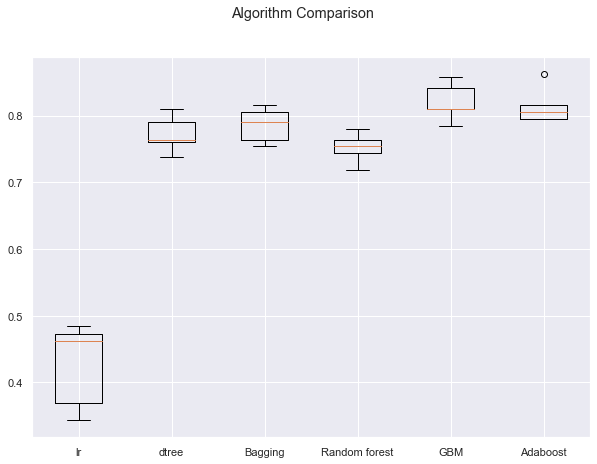

<IPython.core.display.Javascript object>

In [89]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- We can see that GBM is giving the highest cross-validated recall followed by Adaboost.

**Fist, let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [90]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [91]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Building 6 models :
1. Logistic Regression
2. Decision Tree Classifier
3. Bagging Classifier 
4. Random Forest Classifier
5. AdaBoost Classifier 
6. Gradient Boosting Classifier

### Logistic Regression

In [92]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

<IPython.core.display.Javascript object>

In [93]:
# Calculating different metrics on train set
log_reg_model_train_perf = model_performance_classification_sklearn(
    lr, X_train, y_train
)
print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.886,0.474,0.719,0.572


<IPython.core.display.Javascript object>

In [94]:
# Calculating different metrics on validation set
log_reg_model_val_perf = model_performance_classification_sklearn(lr, X_val, y_val)
print("Validation performance:")
log_reg_model_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.891,0.521,0.723,0.606


<IPython.core.display.Javascript object>

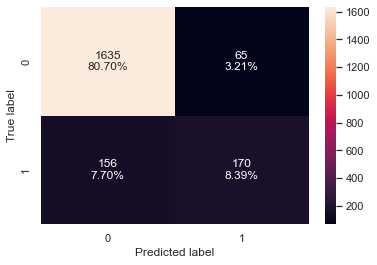

<IPython.core.display.Javascript object>

In [95]:
# creating confusion matrix
confusion_matrix_sklearn(lr, X_val, y_val)

- Logistic Regression has given a similar performance on training and validation set.
- Recall is very low, we can try oversampling (increase training data) to see if the model performance can be improved.

### Decision Tree Classifier

In [96]:
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [97]:
# Calculating different metrics on train set
dtree_model_train_perf = model_performance_classification_sklearn(
    dtree, X_train, y_train
)
print("Training performance:")
dtree_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


<IPython.core.display.Javascript object>

In [98]:
# Calculating different metrics on validation set
dtree_model_val_perf = model_performance_classification_sklearn(dtree, X_val, y_val)
print("Validation performance:")
dtree_model_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.936,0.810,0.795,0.802


<IPython.core.display.Javascript object>

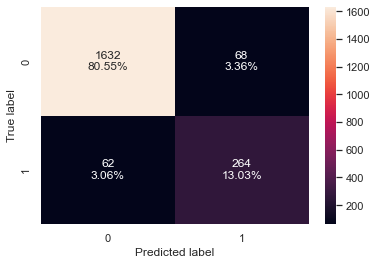

<IPython.core.display.Javascript object>

In [99]:
# creating confusion matrix
confusion_matrix_sklearn(dtree, X_val, y_val)

- Decision Tree classifier performs well and overfits the Training set and could not generalize well in validation set.
- Recall score of Training and validation sets are 100% and 81%.

### Bagging Classifier 

In [100]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [101]:
# Calculating different metrics on train set
bagging_model_train_perf = model_performance_classification_sklearn(
    bagging, X_train, y_train
)
print("Training performance:")
bagging_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.997,0.982,0.998,0.990


<IPython.core.display.Javascript object>

In [102]:
# Calculating different metrics on validation set
bagging_model_val_perf = model_performance_classification_sklearn(bagging, X_val, y_val)
print("Validation performance:")
bagging_model_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.955,0.813,0.895,0.852


<IPython.core.display.Javascript object>

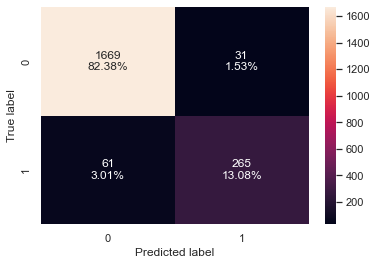

<IPython.core.display.Javascript object>

In [103]:
# creating confusion matrix
confusion_matrix_sklearn(bagging, X_val, y_val)

- Bagging Classifier shows similar results as decision tree classifier.
- Recall score of Train and validation sets are 98% and 81%.

### Random Forest Classifier

In [104]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [105]:
# Calculating different metrics on train set
rf_model_train_perf = model_performance_classification_sklearn(rf, X_train, y_train)
print("Training performance:")
rf_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


<IPython.core.display.Javascript object>

In [106]:
# Calculating different metrics on validation set
rf_model_val_perf = model_performance_classification_sklearn(rf, X_val, y_val)
print("Validation performance:")
rf_model_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.957,0.801,0.922,0.857


<IPython.core.display.Javascript object>

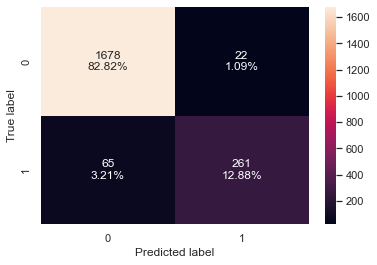

<IPython.core.display.Javascript object>

In [107]:
# creating confusion matrix
confusion_matrix_sklearn(rf, X_val, y_val)

- Random Forest Classifier performs well in training data but overfitting leads to decrease in recall score of validation set.
- Recall score of Train and Validation sets are 100% and 80.1%.

### Adaboost Classifier

In [108]:
adaboost = AdaBoostClassifier(random_state=1)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [109]:
# Calculating different metrics on train set
adaboost_model_train_perf = model_performance_classification_sklearn(
    adaboost, X_train, y_train
)
print("Training performance:")
adaboost_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.959,0.837,0.898,0.866


<IPython.core.display.Javascript object>

In [110]:
# Calculating different metrics on validation set
adaboost_model_val_perf = model_performance_classification_sklearn(
    adaboost, X_val, y_val
)
print("Validation performance:")
adaboost_model_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.961,0.862,0.889,0.875


<IPython.core.display.Javascript object>

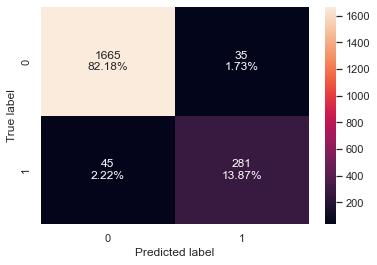

<IPython.core.display.Javascript object>

In [111]:
# creating confusion matrix
confusion_matrix_sklearn(adaboost, X_val, y_val)

- Adaboost classifier generalize well on both training and validation set.
- Recall score of training and validation sets are 83.7% and 86.2%.

### Gradient Boosting Classifier

In [112]:
gbm = GradientBoostingClassifier(random_state=1)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [113]:
# Calculating different metrics on train set
gbm_model_train_perf = model_performance_classification_sklearn(gbm, X_train, y_train)
print("Training performance:")
gbm_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.974,0.877,0.955,0.915


<IPython.core.display.Javascript object>

In [114]:
# Calculating different metrics on validation set
gbm_model_val_perf = model_performance_classification_sklearn(gbm, X_val, y_val)
print("Validation performance:")
gbm_model_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.970,0.862,0.946,0.902


<IPython.core.display.Javascript object>

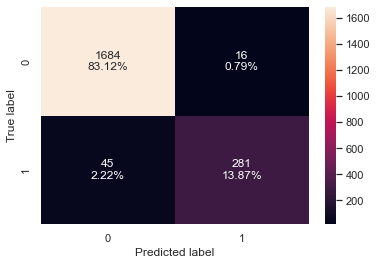

<IPython.core.display.Javascript object>

In [115]:
# creating confusion matrix
confusion_matrix_sklearn(gbm, X_val, y_val)

- Gradient Boosting Classifier also generalize well in training and validation set.
- Recall score of training and validation sets are 87.7% and 86.2%

### Model building - Oversampled data

### Oversampling train data using SMOTE

In [116]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 29)
After Oversampling, the shape of train_y: (10198,) 



<IPython.core.display.Javascript object>

### Logistic Regression on oversampled data

In [117]:
lr_over = LogisticRegression(random_state=1)

# Training the basic logistic regression model with training set
lr_over.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1)

<IPython.core.display.Javascript object>

In [118]:
# Calculating different metrics on train set
lr_over_train_perf = model_performance_classification_sklearn(
    lr_over, X_train_over, y_train_over
)
print("Training performance:")
lr_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.829,0.826,0.830,0.828


<IPython.core.display.Javascript object>

In [119]:
# Calculating different metrics on validation set
lr_over_val_perf = model_performance_classification_sklearn(lr_over, X_val, y_val)
print("validation performance:")
lr_over_val_perf

validation performance:


,Accuracy,Recall,Precision,F1
0,0.830,0.813,0.484,0.606


<IPython.core.display.Javascript object>

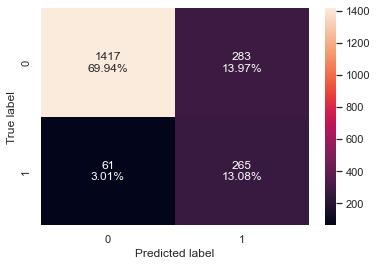

<IPython.core.display.Javascript object>

In [120]:
# creating confusion matrix
confusion_matrix_sklearn(lr_over, X_val, y_val)

- Logistic regression on oversampled data performs well in training and validation data.
- Model performance has improved using oversampling.

### Decision Tree Classification on oversampled data

In [121]:
dtree_over = DecisionTreeClassifier(random_state=1)
dtree_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [122]:
# Calculating different metrics on train set
dtree_over_train_perf = model_performance_classification_sklearn(
    dtree_over, X_train_over, y_train_over
)
print("Training performance:")
dtree_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


<IPython.core.display.Javascript object>

In [123]:
# Calculating different metrics on validation set
dtree_over_val_perf = model_performance_classification_sklearn(dtree_over, X_val, y_val)
print("validation performance:")
dtree_over_val_perf

validation performance:


,Accuracy,Recall,Precision,F1
0,0.933,0.850,0.763,0.804


<IPython.core.display.Javascript object>

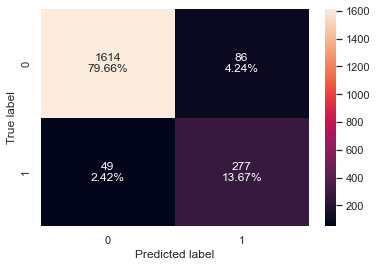

<IPython.core.display.Javascript object>

In [124]:
# creating confusion matrix
confusion_matrix_sklearn(dtree_over, X_val, y_val)

- Decision Tree classifier on oversampled data still overfits the data.
- Model has improved slightly using oversampling.

### Bagging Classifier on oversampled data

In [125]:
bagging_over = BaggingClassifier(random_state=1)
bagging_over.fit(X_train_over, y_train_over)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [126]:
# Calculating different metrics on train set
bagging_over_train_perf = model_performance_classification_sklearn(
    bagging_over, X_train_over, y_train_over
)
print("Training performance:")
bagging_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.998,0.997,0.999,0.998


<IPython.core.display.Javascript object>

In [127]:
# Calculating different metrics on validation set
bagging_over_val_perf = model_performance_classification_sklearn(
    bagging_over, X_val, y_val
)
print("validation performance:")
bagging_over_val_perf

validation performance:


,Accuracy,Recall,Precision,F1
0,0.946,0.859,0.814,0.836


<IPython.core.display.Javascript object>

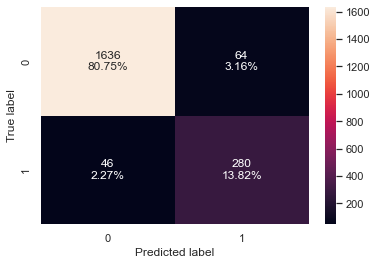

<IPython.core.display.Javascript object>

In [128]:
# creating confusion matrix
confusion_matrix_sklearn(bagging_over, X_val, y_val)

- Bagging classifier on oversampled data still overfits the data.
- Model performance has improved using oversampling.

### Random Forest Classifier on oversampled data

In [129]:
rf_over = RandomForestClassifier(random_state=1)
rf_over.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [130]:
# Calculating different metrics on train set
rf_over_train_perf = model_performance_classification_sklearn(
    rf_over, X_train_over, y_train_over
)
print("Training performance:")
rf_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


<IPython.core.display.Javascript object>

In [131]:
# Calculating different metrics on validation set
rf_over_val_perf = model_performance_classification_sklearn(rf_over, X_val, y_val)
print("validation performance:")
rf_over_val_perf

validation performance:


,Accuracy,Recall,Precision,F1
0,0.953,0.853,0.855,0.854


<IPython.core.display.Javascript object>

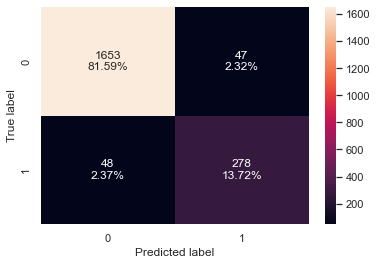

<IPython.core.display.Javascript object>

In [132]:
# creating confusion matrix
confusion_matrix_sklearn(rf_over, X_val, y_val)

- Random forest classifier on oversampled data overfits the data.
- Model performance has improved using oversampling.

### AdaBoost Classifier on oversampled data

In [133]:
adaboost_over = AdaBoostClassifier(random_state=1)
adaboost_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [134]:
# Calculating different metrics on train set
adaboost_over_train_perf = model_performance_classification_sklearn(
    adaboost_over, X_train_over, y_train_over
)
print("Training performance:")
adaboost_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.963,0.967,0.960,0.963


<IPython.core.display.Javascript object>

In [135]:
# Calculating different metrics on validation set
adaboost_over_val_perf = model_performance_classification_sklearn(
    adaboost_over, X_val, y_val
)
print("validation performance:")
adaboost_over_val_perf

validation performance:


,Accuracy,Recall,Precision,F1
0,0.942,0.887,0.781,0.830


<IPython.core.display.Javascript object>

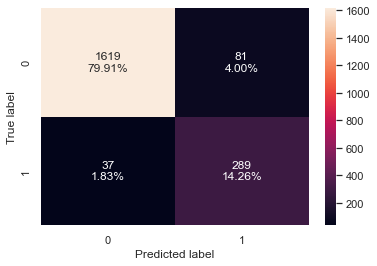

<IPython.core.display.Javascript object>

In [136]:
# creating confusion matrix
confusion_matrix_sklearn(adaboost_over, X_val, y_val)

- Adaboost classifier on oversampled data performs slightly better using oversampling.

### Gradient Boost Classifier on oversampled data

In [137]:
gbm_over = GradientBoostingClassifier(random_state=1)
gbm_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [138]:
# Calculating different metrics on train set
gbm_over_train_perf = model_performance_classification_sklearn(
    gbm_over, X_train_over, y_train_over
)
print("Training performance:")
gbm_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.978,0.980,0.975,0.978


<IPython.core.display.Javascript object>

In [139]:
# Calculating different metrics on validation set
gbm_over_val_perf = model_performance_classification_sklearn(gbm_over, X_val, y_val)
print("validation performance:")
gbm_over_val_perf

validation performance:


,Accuracy,Recall,Precision,F1
0,0.957,0.887,0.853,0.869


<IPython.core.display.Javascript object>

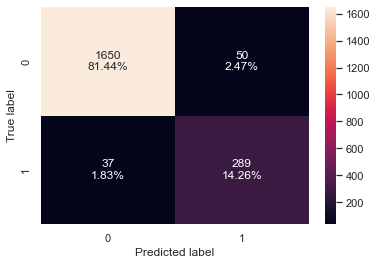

<IPython.core.display.Javascript object>

In [140]:
# creating confusion matrix
confusion_matrix_sklearn(gbm_over, X_val, y_val)

- Gradient Boosting on oversampled data performs slightly better on validation set using oversampling.

### Undersampling train data using Random Under Sampler

In [141]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [142]:
print("Before Undersampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Undersampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label 'Yes': 976
Before Undersampling, counts of label 'No': 5099 

After Undersampling, counts of label 'Yes': 976
After Undersampling, counts of label 'No': 976 

After Undersampling, the shape of train_X: (1952, 29)
After Undersampling, the shape of train_y: (1952,) 



<IPython.core.display.Javascript object>

### Logistic Regression on undersampled data

In [143]:
lr_under = LogisticRegression(random_state=1)
lr_under.fit(X_train_un, y_train_un)

LogisticRegression(random_state=1)

<IPython.core.display.Javascript object>

In [144]:
# Calculating different metrics on train set
lr_under_train_perf = model_performance_classification_sklearn(
    lr_under, X_train_un, y_train_un
)
print("Training performance:")
lr_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.800,0.793,0.805,0.799


<IPython.core.display.Javascript object>

In [145]:
# Calculating different metrics on validation set
lr_under_val_perf = model_performance_classification_sklearn(lr_under, X_val, y_val)
print("Validation performance:")
lr_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.813,0.810,0.454,0.582


<IPython.core.display.Javascript object>

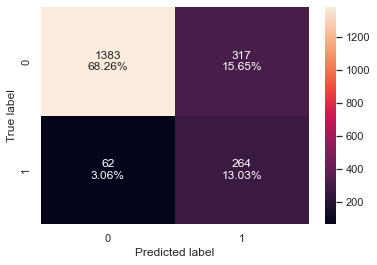

<IPython.core.display.Javascript object>

In [146]:
# creating confusion matrix
confusion_matrix_sklearn(lr_under, X_val, y_val)

- Logistic regression on undersampled data generalize well on both train and validation sets.
- Recall score is same as oversampled data but still better.

### Decision Tree Classifier on undersampled data

In [147]:
dtree_under = DecisionTreeClassifier(random_state=1)
dtree_under.fit(X_train_un, y_train_un)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [148]:
# Calculating different metrics on train set
dtree_under_train_perf = model_performance_classification_sklearn(
    dtree_under, X_train_un, y_train_un
)
print("Training performance:")
dtree_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


<IPython.core.display.Javascript object>

In [149]:
# Calculating different metrics on validation set
dtree_under_val_perf = model_performance_classification_sklearn(
    dtree_under, X_val, y_val
)
print("Validation performance:")
dtree_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.900,0.920,0.629,0.747


<IPython.core.display.Javascript object>

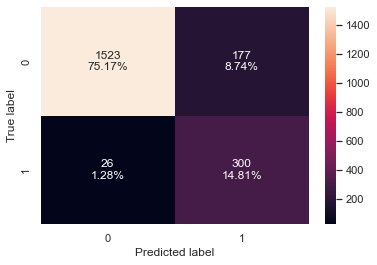

<IPython.core.display.Javascript object>

In [150]:
# creating confusion matrix
confusion_matrix_sklearn(dtree_under, X_val, y_val)

- Decision Tree classifier performs well on both training and validation set.
- This model gives highest recall score of 92% when compared to decision tree using oversampled and with normal dataset.

### Bagging Classifier on undersampled data

In [151]:
bagging_under = BaggingClassifier(random_state=1)
bagging_under.fit(X_train_un, y_train_un)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [152]:
# Calculating different metrics on train set
bagging_under_train_perf = model_performance_classification_sklearn(
    bagging_under, X_train_un, y_train_un
)
print("Training performance:")
bagging_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.995,0.992,0.998,0.995


<IPython.core.display.Javascript object>

In [153]:
# Calculating different metrics on validation set
bagging_under_val_perf = model_performance_classification_sklearn(
    bagging_under, X_val, y_val
)
print("Validation performance:")
bagging_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.926,0.920,0.708,0.800


<IPython.core.display.Javascript object>

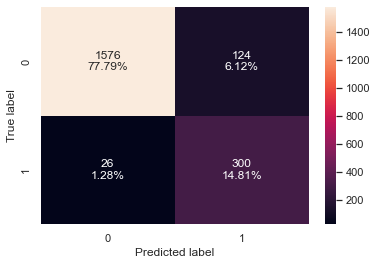

<IPython.core.display.Javascript object>

In [154]:
# creating confusion matrix
confusion_matrix_sklearn(bagging_under, X_val, y_val)

- Bagging Classifier on undersampled data performs generalize well in both train and validation sets.
- Recall score of this model is also good with 92%.

### Random Forest Classifier on undersampled data

In [155]:
rf_under = RandomForestClassifier(random_state=1)
rf_under.fit(X_train_un, y_train_un)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [156]:
# Calculating different metrics on train set
rf_under_train_perf = model_performance_classification_sklearn(
    rf_under, X_train_un, y_train_un
)
print("Training performance:")
rf_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


<IPython.core.display.Javascript object>

In [157]:
# Calculating different metrics on validation set
rf_under_val_perf = model_performance_classification_sklearn(rf_under, X_val, y_val)
print("Validation performance:")
rf_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.935,0.933,0.734,0.822


<IPython.core.display.Javascript object>

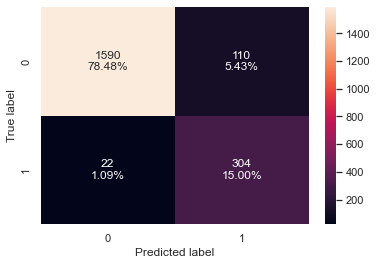

<IPython.core.display.Javascript object>

In [158]:
# creating confusion matrix
confusion_matrix_sklearn(rf_under, X_val, y_val)

- Random Forest Classifier on undersampled data shows similar results compared with Bagging classifier on undersampeled data.
- Recall score of 100% and 93.3% training and validation set.

### AdaBoost Classifier on undersampled data

In [159]:
adaboost_under = AdaBoostClassifier(random_state=1)
adaboost_under.fit(X_train_un, y_train_un)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [160]:
# Calculating different metrics on train set
adaboost_under_train_perf = model_performance_classification_sklearn(
    adaboost_under, X_train_un, y_train_un
)
print("Training performance:")
adaboost_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.950,0.954,0.947,0.950


<IPython.core.display.Javascript object>

In [161]:
# Calculating different metrics on validation set
adaboost_under_val_perf = model_performance_classification_sklearn(
    adaboost_under, X_val, y_val
)
print("Validation performance:")
adaboost_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.929,0.957,0.707,0.814


<IPython.core.display.Javascript object>

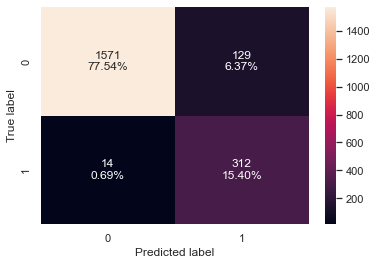

<IPython.core.display.Javascript object>

In [162]:
# creating confusion matrix
confusion_matrix_sklearn(adaboost_under, X_val, y_val)

- AdaBoost Classifier on undersampled data shows similar results for training and validation set.
- Model performs well on both training and validation set.
- With the Recall score of 95.4% and 95.7% in training and validation set.

### Gradient Boosting Classifier on undersampled data

In [163]:
gbm_under = GradientBoostingClassifier(random_state=1)
gbm_under.fit(X_train_un, y_train_un)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [164]:
# Calculating different metrics on train set
gbm_under_train_perf = model_performance_classification_sklearn(
    gbm_under, X_train_un, y_train_un
)
print("Training performance:")
gbm_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.975,0.980,0.972,0.976


<IPython.core.display.Javascript object>

In [165]:
# Calculating different metrics on validation set
gbm_under_val_perf = model_performance_classification_sklearn(gbm_under, X_val, y_val)
print("Validation performance:")
gbm_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.935,0.957,0.726,0.825


<IPython.core.display.Javascript object>

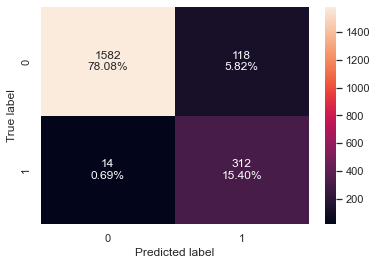

<IPython.core.display.Javascript object>

In [166]:
# creating confusion matrix
confusion_matrix_sklearn(gbm_under, X_val, y_val)

- Gradient Boosting Classifier on undersampled data performs equally on training and validation data except for precision and F1 scores.
- Recall score of training and validation is 98% and 95%.

In [167]:
# training performance comparison

models_train_comp_df1 = pd.concat(
    [
        log_reg_model_train_perf.T,
        lr_over_train_perf.T,
        lr_under_train_perf.T,
        dtree_model_train_perf.T,
        dtree_over_train_perf.T,
        dtree_under_train_perf.T,
        bagging_model_train_perf.T,
        bagging_over_train_perf.T,
        bagging_under_train_perf.T,
        rf_model_train_perf.T,
        rf_over_train_perf.T,
        rf_under_train_perf.T,
        adaboost_model_train_perf.T,
        adaboost_over_train_perf.T,
        adaboost_under_train_perf.T,
        gbm_model_train_perf.T,
        gbm_over_train_perf.T,
        gbm_under_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df1.columns = [
    "Logistic Regression",
    "Logistic Regression with oversampled data",
    "Logistic Regression with undersampled data",
    "Decision Tree Classifier",
    "Decision Tree Classifier with oversampled data",
    "Decision Tree Classifier with undersampled data",
    "Bagging Classifier",
    "Bagging Classifier with oversampled data",
    "Bagging Classifier with undersampled data",
    "Random Forest Classifier",
    "Random Forest Classifier with oversampled data",
    "Random Forest Classifier with undersampled data",
    "Adaboost Classifier",
    "Adaboost Classifier with oversampled data",
    "Adaboost Classifier with undersampled data",
    "Gradient Boosting Classifier",
    "Gradient Boosting Classifier with oversampled data",
    "Gradient Boosting Classifier with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df1.T

Training performance comparison:


,Accuracy,Recall,Precision,F1
Logistic Regression,0.886,0.474,0.719,0.572
Logistic Regression with oversampled data,0.829,0.826,0.830,0.828
Logistic Regression with undersampled data,0.800,0.793,0.805,0.799
Decision Tree Classifier,1.000,1.000,1.000,1.000
Decision Tree Classifier with oversampled data,1.000,1.000,1.000,1.000
Decision Tree Classifier with undersampled data,1.000,1.000,1.000,1.000
Bagging Classifier,0.997,0.982,0.998,0.990
Bagging Classifier with oversampled data,0.998,0.997,0.999,0.998
Bagging Classifier with undersampled data,0.995,0.992,0.998,0.995
Random Forest Classifier,1.000,1.000,1.000,1.000


<IPython.core.display.Javascript object>

In [168]:
# Validation performance comparison

models_train_comp_df2 = pd.concat(
    [
        log_reg_model_val_perf.T,
        lr_over_val_perf.T,
        lr_under_train_perf.T,
        dtree_model_val_perf.T,
        dtree_over_val_perf.T,
        dtree_under_val_perf.T,
        bagging_model_val_perf.T,
        bagging_over_val_perf.T,
        bagging_under_val_perf.T,
        rf_model_val_perf.T,
        rf_over_val_perf.T,
        rf_under_val_perf.T,
        adaboost_model_val_perf.T,
        adaboost_over_val_perf.T,
        adaboost_under_val_perf.T,
        gbm_model_val_perf.T,
        gbm_over_val_perf.T,
        gbm_under_val_perf.T,
    ],
    axis=1,
)
models_train_comp_df2.columns = [
    "Logistic Regression",
    "Logistic Regression with oversampled data",
    "Logistic Regression with undersampled data",
    "Decision Tree Classifier",
    "Decision Tree Classifier with oversampled data",
    "Decision Tree Classifier with undersampled data",
    "Bagging Classifier",
    "Bagging Classifier with oversampled data",
    "Bagging Classifier with undersampled data",
    "Random Forest Classifier",
    "Random Forest Classifier with oversampled data",
    "Random Forest Classifier with undersampled data",
    "Adaboost Classifier",
    "Adaboost Classifier with oversampled data",
    "Adaboost Classifier with undersampled data",
    "Gradient Boosting Classifier",
    "Gradient Boosting Classifier with oversampled data",
    "Gradient Boosting Classifier with undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df2.T

Validation performance comparison:


,Accuracy,Recall,Precision,F1
Logistic Regression,0.891,0.521,0.723,0.606
Logistic Regression with oversampled data,0.830,0.813,0.484,0.606
Logistic Regression with undersampled data,0.800,0.793,0.805,0.799
Decision Tree Classifier,0.936,0.810,0.795,0.802
Decision Tree Classifier with oversampled data,0.933,0.850,0.763,0.804
Decision Tree Classifier with undersampled data,0.900,0.920,0.629,0.747
Bagging Classifier,0.955,0.813,0.895,0.852
Bagging Classifier with oversampled data,0.946,0.859,0.814,0.836
Bagging Classifier with undersampled data,0.926,0.920,0.708,0.800
Random Forest Classifier,0.957,0.801,0.922,0.857


<IPython.core.display.Javascript object>

## Model Performance

### Training and Validation perfomance comparison for all 18 models:

In [169]:
# Comparing Training and Validation Perfomance
df = pd.concat([models_train_comp_df1.T, models_train_comp_df2.T], axis=1)
df.columns = [
    "Accuracy_Train",
    "Recall_Train",
    "Precision_Train",
    "F1_Train",
    "Accuracy_Val",
    "Recall_Val",
    "Precision_Val",
    "F1_Val",
]
df

,Accuracy_Train,Recall_Train,Precision_Train,F1_Train,Accuracy_Val,Recall_Val,Precision_Val,F1_Val
Logistic Regression,0.886,0.474,0.719,0.572,0.891,0.521,0.723,0.606
Logistic Regression with oversampled data,0.829,0.826,0.830,0.828,0.830,0.813,0.484,0.606
Logistic Regression with undersampled data,0.800,0.793,0.805,0.799,0.800,0.793,0.805,0.799
Decision Tree Classifier,1.000,1.000,1.000,1.000,0.936,0.810,0.795,0.802
Decision Tree Classifier with oversampled data,1.000,1.000,1.000,1.000,0.933,0.850,0.763,0.804
Decision Tree Classifier with undersampled data,1.000,1.000,1.000,1.000,0.900,0.920,0.629,0.747
Bagging Classifier,0.997,0.982,0.998,0.990,0.955,0.813,0.895,0.852
Bagging Classifier with oversampled data,0.998,0.997,0.999,0.998,0.946,0.859,0.814,0.836
Bagging Classifier with undersampled data,0.995,0.992,0.998,0.995,0.926,0.920,0.708,0.800
Random Forest Classifier,1.000,1.000,1.000,1.000,0.957,0.801,0.922,0.857


<IPython.core.display.Javascript object>

**Observations**
- Gradient Boosting Classifier with undersampled data and Adaboost Classifier with undersampled data shows top performance in both training and validation sets. Hence **Gradient Boosting Classifier with undersampled data is the best model with high recall of 98% in Training set and 95% in validation set.**
- Second top performance by Random Forest Random Forest Classifier with undersampled data and Bagging Classifier with undersampled data.
- It is evident that undersampled data performed well in all models.
- Logistic Regression model shows least performance in train and validation set.

### Feature Importance of Gradient Boosting Classifier Model with undersampled data

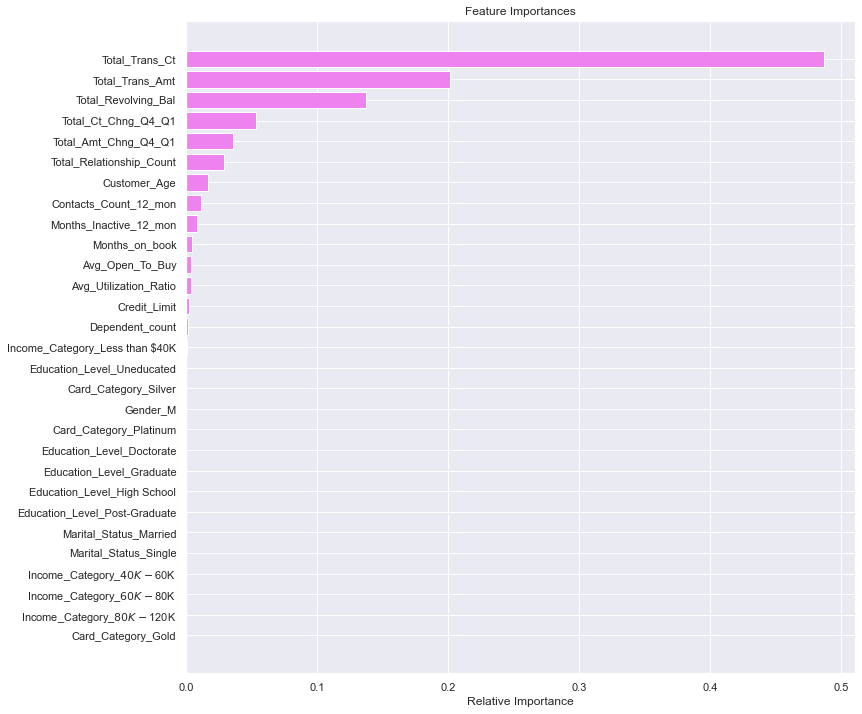

<IPython.core.display.Javascript object>

In [170]:
feature_names = X_train.columns
importances = gbm_under.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total Transaction count is the most important feature followed by Total Transaction Amount and Total Revolving Balance.

## Hyperparameter tuning Decision Tree - RandomizedSearchCV

### Adaboost Classifier

In [171]:
# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_jobs=-1,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 90, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8452747252747251:


<IPython.core.display.Javascript object>

In [172]:
# building model with best parameters
adb_tuned2 = AdaBoostClassifier(
    n_estimators=90,
    learning_rate=0.2,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)

# Fit the model on training data
adb_tuned2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=90, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance

Training performance:
   Accuracy  Recall  Precision    F1
0     0.991   0.962      0.980 0.971
*************************************


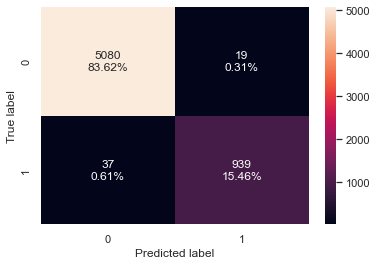

<IPython.core.display.Javascript object>

In [173]:
# Calculating different metrics on train set
Adaboost_random_train = model_performance_classification_sklearn(
    adb_tuned2, X_train, y_train
)
print("Training performance:")
print(Adaboost_random_train)


print("*************************************")

# creating confusion matrix
confusion_matrix_sklearn(adb_tuned2, X_train, y_train)

- Adaboost classifier with the data(before over or under sampling) : The hyper parameter tuning is done and this tuned model performance has improved from from 83% to 96.2% in training set.

Validation performance:
   Accuracy  Recall  Precision    F1
0     0.971   0.877      0.938 0.906
*************************************


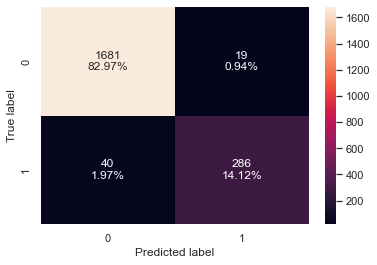

<IPython.core.display.Javascript object>

In [174]:
# Calculating different metrics on validation set
Adaboost_random_train = model_performance_classification_sklearn(
    adb_tuned2, X_val, y_val
)
print("Validation performance:")
print(Adaboost_random_train)


print("*************************************")

# creating confusion matrix
confusion_matrix_sklearn(adb_tuned2, X_val, y_val)

- Model performs well on validation data set also.

### GradientBoostingClassifier

In [175]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=gbc_tuned,
    param_distributions=parameters,
    n_jobs=-1,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.8, 'n_estimators': 250, 'max_features': 0.8} with CV score=0.8596180010465725:


<IPython.core.display.Javascript object>

In [176]:
# building model with best parameters
gbc_tuned2 = GradientBoostingClassifier(
    subsample=0.8, n_estimators=250, max_features=0.8, random_state=1
)

# Fit the model on training data
gbc_tuned2.fit(X_train, y_train)

GradientBoostingClassifier(max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.8)

<IPython.core.display.Javascript object>

#### Checking model performance

Training performance:
   Accuracy  Recall  Precision    F1
0     0.990   0.957      0.981 0.969
*************************************


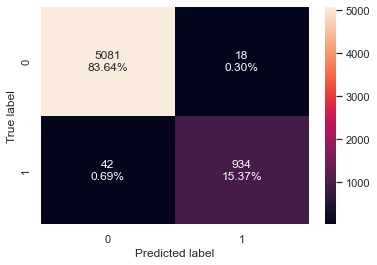

<IPython.core.display.Javascript object>

In [177]:
# Calculating different metrics on train set
gbc_random_train = model_performance_classification_sklearn(
    gbc_tuned2, X_train, y_train
)
print("Training performance:")
print(gbc_random_train)


print("*************************************")

# creating confusion matrix
confusion_matrix_sklearn(gbc_tuned2, X_train, y_train)

Validation performance:
   Accuracy  Recall  Precision    F1
0     0.973   0.890      0.939 0.913
*************************************


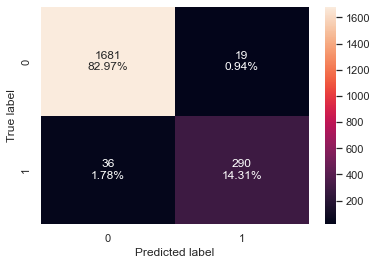

<IPython.core.display.Javascript object>

In [178]:
# Calculating different metrics on validation set
gbc_random_train = model_performance_classification_sklearn(gbc_tuned2, X_val, y_val)
print("Validation performance:")
print(gbc_random_train)


print("*************************************")

# creating confusion matrix
confusion_matrix_sklearn(gbc_tuned2, X_val, y_val)

- Gradient Boosting Classifier after Hyper parameter tuning performs well on both training and validation set.
- Recall score of training is 95% and validation is 89%.

### Logistic Regression Model

In [179]:
log_tuned = LogisticRegression(random_state=1)
param_grid = [
    {
        "penalty": ["l1", "l2", "elasticnet", "none"],
        "C": np.logspace(-4, 4, 20),
        "solver": ["lbfgs", "newton-cg", "liblinear", "sag", "saga"],
        "max_iter": [100, 1000, 2500, 5000],
    }
]


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=log_tuned,
    param_distributions=param_grid,
    n_jobs=-1,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 2500, 'C': 29.763514416313132} with CV score=0.5655625327053898:


<IPython.core.display.Javascript object>

In [180]:
# building model with best parameters
log_tuned2 = LogisticRegression(
    random_state=1,
    solver="liblinear",
    penalty="l1",
    max_iter=2500,
    C=29.763514416313132,
)

# Fit the model on training data
log_tuned2.fit(X_train, y_train)

LogisticRegression(C=29.763514416313132, max_iter=2500, penalty='l1',
                   random_state=1, solver='liblinear')

<IPython.core.display.Javascript object>

#### Checking model performance

Training performance:
   Accuracy  Recall  Precision    F1
0     0.901   0.569      0.754 0.648
*************************************


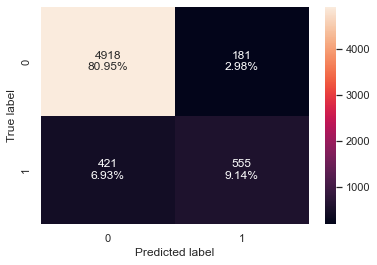

<IPython.core.display.Javascript object>

In [181]:
# Calculating different metrics on train set
log_random_train = model_performance_classification_sklearn(
    log_tuned2, X_train, y_train
)
print("Training performance:")
print(log_random_train)


print("*************************************")

# creating confusion matrix
confusion_matrix_sklearn(log_tuned2, X_train, y_train)

Validation performance:
   Accuracy  Recall  Precision    F1
0     0.914   0.620      0.802 0.699
*************************************


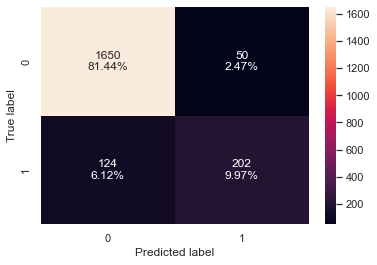

<IPython.core.display.Javascript object>

In [182]:
# Calculating different metrics on validation set
log_random_train = model_performance_classification_sklearn(log_tuned2, X_val, y_val)
print("Validation performance:")
print(log_random_train)


print("*************************************")

# creating confusion matrix
confusion_matrix_sklearn(log_tuned2, X_val, y_val)

- The performance of Logistic Regression after hyper parameter tuning has improved significantly.
- Recall score of the training set is 56% and validation set is 62%.

## Pipelines for productionizing the model

In [183]:
# creating a list of numerical variables
numerical_features = [
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio'
]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = ['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes


<IPython.core.display.Javascript object>

In [184]:
# Separating target variable and other variables
X = data.drop(columns="Attrition_Flag")
Y = data["Attrition_Flag"]

<IPython.core.display.Javascript object>

- Now we already know the best model we need to process with, so we don't need to divide data into 3 sets - train, validation and test

In [185]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


<IPython.core.display.Javascript object>

In [186]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "GBC",
            GradientBoostingClassifier(
                subsample=0.8, n_estimators=250, max_features=0.8, random_state=1
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_...
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Avg_Utilization_Ratio']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Education_Level',
                                                   'Marital_Status',
                                                   'Income_Category',
                                                   'Card_Category'])])),
                ('GBC',
                 GradientBoostingClassifier(max_features=0.8, n_estimators=250,
                                            random_state=1, subsample=0.8))])

<IPython.core.display.Javascript object>

In [187]:
# transforming and predicting on test data
model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

<IPython.core.display.Javascript object>

# Business Recommendations

### We have been able to build a predictive model:

    a) that bank can deploy this model to identify customers who are at the risk of attrition.
    
    b) that the bank can use to find the key causes that drive attrition.

    c) based on which bank can take appropriate actions to build better retention policies for customers.

- Factors that drive the attrition - Total_Trans_Ct, Total_Trans_Amt, Total_Revolving_Bal.

- `Total_Trans_Ct`: Less number of transactions in a year leads to attrition of a customer - to increase the usage of cards the bank can provide offers like cashback, special discounts on the purchase of something, etc so that customers feel motivated to use their cards.

- `Total_Trans_Amt`: Less number of transactions can lead to less transaction amount and eventually leads to customer attrition. Bank can provide offers on the purchase of costlier items which in-turn will benefit the customers and bank both.

- `Total_Revolving_Bal`: Customers with less total revolving balance are the ones who attrited, such customers must have cleared their dues and opted out of the credit card service. After the customer has cleared the dues bank can ask for a feedback on their experience and get to the casue of attrition.

- Female customers should be the target customers for any kind of marketing campaign as they are the ones who utilize their credits, make more and higher amount transactions. But their credit limit is less so increasing the credit limit for such customers can profit the bank.

- Months_Inactive: As inactivity increases the attrition also increases, 2-4 months of inactivity are the biggest contributors of attrition -Bank can send automated messages to engage customers, these messages can be about their monthly activity, new offers or services, etc.

- Highest attrition is among the customers who interacted/reached out the most with/to the bank, This indicates that the bank is not able to resolve the problems faced by customers leading to attrition - a feedback collection system can be set-up to check if the customers are satisfied with the resolution provided, if not, the bank should act upon it accordingly.